In [1]:
%matplotlib inline
main_path = './../../../Dropbox/McGill-publication/Papers/Multisite/'

import seaborn; seaborn.set()
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")

/home/cdansereau/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from nistats import glm

def load_file(path):
    mat = scipy.io.loadmat(path)
    return mat

path_csv = 'demographic_1000fcon_consolidated.csv'
demograph = pd.read_csv(path_csv, index_col=0)
#subj_names = demograph[demograph.multisite == 1].values[:,0]
subj_names = demograph[demograph.multisite == 1].index.values

conn = load_file(main_path + 'figures/connectomes_corr/connectome_basc_' + 'sub19738' + '.mat' )
conn.get('conn').shape

(4950, 1)

In [3]:
subj_names
print demograph.sex.mean(),demograph.sex.std()
print demograph.age.mean(),demograph.age.std()

0.417391304348 0.493844823612
23.8579710145 5.14782652818


In [4]:
np.sum(demograph.multisite == 8)

print(np.sum([23,26,198,19,20,22,19,31]))
print(np.sum([21,26,195,17,18,20,17,31]))

358
345


In [5]:
from sklearn import linear_model
from sklearn.preprocessing import normalize


def rmconf(x,conf):
    print(x.shape,conf.shape)
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(normalize(conf), x)
    return  x - reg.predict(normalize(conf))
    

    

In [59]:
demograph.loc['sub73002']

FD            0.114678
multisite     8.000000
age          25.000000
sex           1.000000
Name: sub73002, dtype: float64

In [6]:
import re, os
path = main_path + '/figures/connectomes_corr/'
list_connectomes = os.listdir(path)

demog_tmp = list()
all_conn_sites = list()
groups_vec = []
demog_tmp=[]
k=0
for site in range(1,9):
    # retrieve the subject name for that site
    subj_names = demograph[demograph.multisite == site].index.values

    for subj_name in subj_names:
        try:
            subj_name = subj_name.replace(' ','')
            conn_vec = load_file(path + 'connectome_basc_' +subj_name+'.mat' ).get('conn')
            
            if k==0:
                all_conn_sites = conn_vec
                demog_tmp.append(demograph.loc[subj_name].values[[0,2,3]])
                k=1
            else:
                all_conn_sites = np.hstack([all_conn_sites , conn_vec])
                demog_tmp = np.vstack((demog_tmp,demograph.loc[subj_name].values[[0,2,3]]))
            
            groups_vec.append(site)
        except Exception as e: 
            print(e)
            pass
        
#print all_conn_sites.shape,demog_tmp.shape
groups_vec = np.array(groups_vec)



# detrend the connections
#detrended_conn_all = rmconf(all_conn_sites.T,demog_tmp)

list_conn_sites = list()
detrended_conn = list()
demog_data = list()
for site in range(1,9):
    # retrieve the subject name for that site
    subj_names = demograph[demograph.multisite == site].index.values
    
    #detrended_conn.append(detrended_conn_all[groups_vec == site,:])
    demog_data.append(demog_tmp[groups_vec == site,:])
    k=0
    for subj_name in subj_names:
        try:
            subj_name = subj_name.replace(' ','')
            conn_vec = load_file(path + 'connectome_basc_' +subj_name+'.mat' ).get('conn')
            if k==0:
                conns_stack = conn_vec
                k=1
            else:
                conns_stack = np.hstack([conns_stack , conn_vec])
        except Exception as e: 
            print(e)
            pass
        #print(conns_stack.shape)
    list_conn_sites.append(conns_stack.copy())
            
#list_conn_sites

import statsmodels.api as sm
#detrended_conn_all = rmconf(all_conn_sites.T,demog_tmp)



[Errno 2] No such file or directory: './../../../Dropbox/McGill-publication/Papers/Multisite//figures/connectomes_corr/connectome_basc_sub55760.mat'
[Errno 2] No such file or directory: './../../../Dropbox/McGill-publication/Papers/Multisite//figures/connectomes_corr/connectome_basc_sub24528.mat'
[Errno 2] No such file or directory: './../../../Dropbox/McGill-publication/Papers/Multisite//figures/connectomes_corr/connectome_basc_sub55760.mat'
[Errno 2] No such file or directory: './../../../Dropbox/McGill-publication/Papers/Multisite//figures/connectomes_corr/connectome_basc_sub24528.mat'


In [49]:
ls ./../../../Dropbox/McGill-publication/Papers/Multisite//figures/connectomes_corr/


connectome_basc_sub00156.mat  connectome_basc_sub53324.mat
connectome_basc_sub00294.mat  connectome_basc_sub53422.mat
connectome_basc_sub01361.mat  connectome_basc_sub53615.mat
connectome_basc_sub02115.mat  connectome_basc_sub54257.mat
connectome_basc_sub02142.mat  connectome_basc_sub54329.mat
connectome_basc_sub02248.mat  connectome_basc_sub54846.mat
connectome_basc_sub02459.mat  connectome_basc_sub54933.mat
connectome_basc_sub02591.mat  connectome_basc_sub54976.mat
connectome_basc_sub02953.mat  connectome_basc_sub55114.mat
connectome_basc_sub03345.mat  connectome_basc_sub55660.mat
connectome_basc_sub04117.mat  connectome_basc_sub55874.mat
connectome_basc_sub04187.mat  connectome_basc_sub56353.mat
connectome_basc_sub04270.mat  connectome_basc_sub56945.mat
connectome_basc_sub04491.mat  connectome_basc_sub57028.mat
connectome_basc_sub04665.mat  connectome_basc_sub57221.mat
connectome_basc_sub05306.mat  connectome_basc_sub57368.mat
connectome_basc_sub05453.mat  connectome_basc_sub58360.m

In [48]:
demograph['multisite']

FD   multisite  age  sex
                                       
sub19738  0.226758          1   27    0
sub23750  0.131166          1   37    1
sub23927  0.119944          1   21    1
sub30072  0.157157          1   26    0
sub31837  0.147649          1   34    0
sub37548  0.206610          1   30    1
sub52358  0.113791          1   40    0
sub54257  0.157475          1   29    0
sub54329  0.094442          1   30    0
sub73823  0.218867          1   24    0
sub76160  0.135008          1   34    1
sub77572  0.142806          1   27    0
sub80221  0.186891          1   26    1
sub81887  0.135750          1   32    1
sub85922  0.148966          1   30    1
sub86414  0.107368          1   23    0
sub90658  0.213161          1   32    0
sub90893  0.159216          1   39    0
sub91622  0.144248          1   33    1
sub94042  0.230116          1   27    0
sub96234  0.122483          1   30    0
sub06204  0.173564          2   34    1
sub06716  0.211618          2   23    0
sub12855  0.166460          2   33    1
sub18913  0.214912          2   29    0
sub23506  0.189511          2   27    0
sub27536  0.135958          2   25    1
sub27711  0.139817          2   26    0
sub27797  0.191139          2   31    1
sub28092  0.157458          2   26    0
...            ...        ...  ...  ...
sub02142  0.135135          8   21    0
sub03345  0.194782          8   25    1
sub12941  0.097942          8   26    0
sub16236  0.137283          8   25    1
sub26219  0.076323          8   28    1
sub26678  0.133308          8   24    0
sub28304  0.149640          8   21    0
sub35127  0.098765          8   28    1
sub35575  0.141974          8   23    1
sub45636  0.273326          8   24    0
sub46405  0.087789          8   23    0
sub49563  0.097330          8   26    0
sub52065  0.209759          8   26    1
sub53324  0.126341          8   27    1
sub58674  0.129710          8   28    0
sub61357  0.209507          8   21    0
sub73002  0.114678          8   25    1
sub73125  0.210598          8   25    1
sub73471  0.161968          8   27    1
sub74078  0.208507          8   26    0
sub80832  0.123362          8   26    0
sub82830  0.175501          8   23    0
sub88150  0.160871          8   26    0
sub88823  0.206162          8   27    1
sub95001  0.146468          8   28    1
sub95721  0.180909          8   21    0
sub95786  0.193460          8   26    1
sub95967  0.129903          8   27    1
sub97935  0.178776          8   29    0
sub99965  0.123977          8   23    0

[345 rows x 4 columns]

In [39]:
demograph

FD   multisite  age  sex
                                       
sub19738  0.226758          1   27    0
sub23750  0.131166          1   37    1
sub23927  0.119944          1   21    1
sub30072  0.157157          1   26    0
sub31837  0.147649          1   34    0
sub37548  0.206610          1   30    1
sub52358  0.113791          1   40    0
sub54257  0.157475          1   29    0
sub54329  0.094442          1   30    0
sub73823  0.218867          1   24    0
sub76160  0.135008          1   34    1
sub77572  0.142806          1   27    0
sub80221  0.186891          1   26    1
sub81887  0.135750          1   32    1
sub85922  0.148966          1   30    1
sub86414  0.107368          1   23    0
sub90658  0.213161          1   32    0
sub90893  0.159216          1   39    0
sub91622  0.144248          1   33    1
sub94042  0.230116          1   27    0
sub96234  0.122483          1   30    0
sub06204  0.173564          2   34    1
sub06716  0.211618          2   23    0
sub12855  0.166460          2   33    1
sub18913  0.214912          2   29    0
sub23506  0.189511          2   27    0
sub27536  0.135958          2   25    1
sub27711  0.139817          2   26    0
sub27797  0.191139          2   31    1
sub28092  0.157458          2   26    0
...            ...        ...  ...  ...
sub02142  0.135135          8   21    0
sub03345  0.194782          8   25    1
sub12941  0.097942          8   26    0
sub16236  0.137283          8   25    1
sub26219  0.076323          8   28    1
sub26678  0.133308          8   24    0
sub28304  0.149640          8   21    0
sub35127  0.098765          8   28    1
sub35575  0.141974          8   23    1
sub45636  0.273326          8   24    0
sub46405  0.087789          8   23    0
sub49563  0.097330          8   26    0
sub52065  0.209759          8   26    1
sub53324  0.126341          8   27    1
sub58674  0.129710          8   28    0
sub61357  0.209507          8   21    0
sub73002  0.114678          8   25    1
sub73125  0.210598          8   25    1
sub73471  0.161968          8   27    1
sub74078  0.208507          8   26    0
sub80832  0.123362          8   26    0
sub82830  0.175501          8   23    0
sub88150  0.160871          8   26    0
sub88823  0.206162          8   27    1
sub95001  0.146468          8   28    1
sub95721  0.180909          8   21    0
sub95786  0.193460          8   26    1
sub95967  0.129903          8   27    1
sub97935  0.178776          8   29    0
sub99965  0.123977          8   23    0

[345 rows x 4 columns]

In [7]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm


//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


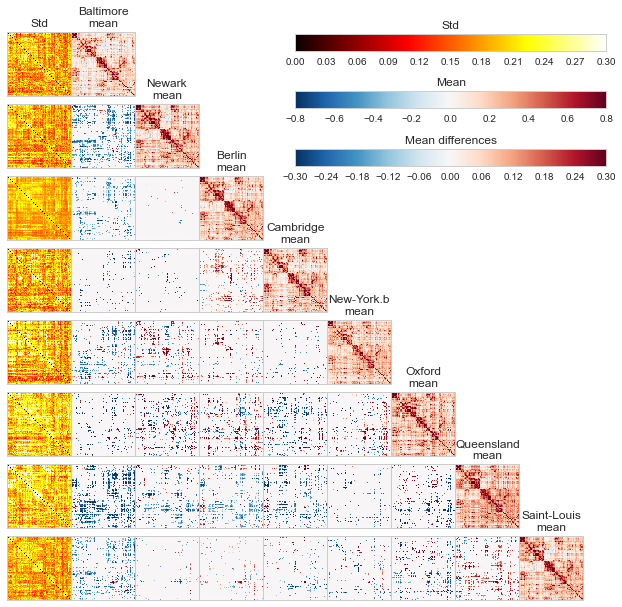

In [7]:


reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(16, 16),dpi=150)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(1,len(list_conn_sites)+1, wspace=0.0, hspace=0.0)
    grid1.update(wspace=0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0.5)
    for sidx in range(0,len(list_conn_sites)+1):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        for site_diff_idx in range(0,len(list_conn_sites)):
            grid2 = gridspec.GridSpecFromSubplotSpec(len(list_conn_sites),1, subplot_spec=grid1[sidx], wspace=0.0, hspace=0.0)
            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            #grid2.update(left=0.05, right=0.48, wspace=0.05)
            
            if sidx == 0:
                # include the last std at the end of the 
                site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
                ax2 = plt.subplot(grid2[site_diff_idx,:])
                vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
                #plt.ylabel('std')
                if site_diff_idx == 0:
                    plt.title('Std')
                
            else:
                if site_diff_idx == sidx-1:

                    #plt.imshow(site_std, interpolation="none")
                    #plt.delaxes()
                    ax1 = plt.subplot(grid2[site_diff_idx,:])
                    vis.mat(hc.ordermat(site_mean,order),lim_mean,False,False)
                    plt.title(site_names[sidx-1] + '\nmean')

                    """
                    if (sidx!=0):
                        site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx-1])
                        ax2 = plt.subplot(grid2[site_diff_idx-1,:])
                        vis.matrix.mat(site_std_tmp,[0,0.5],False,False)
                        plt.title('std')
                    """

                elif site_diff_idx > sidx-1:
                    conn_vec_tmp = list_conn_sites[site_diff_idx]
                    #t, prob = scipy.stats.ttest_ind(conn_vec,conn_vec_tmp)
                    #print demog_data[sidx-1]
                    x_1 = sm.tools.add_constant(demog_data[sidx-1])
                    x_2 = sm.tools.add_constant(demog_data[site_diff_idx])
                    x_ = np.vstack((x_1,x_2))
                    contrast = np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
                    #print contrast.shape,x_.shape
                    x_ = np.hstack((contrast[:,np.newaxis],x_))
                    pval = []
                    for nn in range(conn_vec.shape[0]):
                        y_ = np.hstack((conn_vec[nn,:],conn_vec_tmp[nn,:]))
                        glm_ = sm.GLM(y_, x_)
                        res = glm_.fit()
                        #print(res.summary())
                        pval.append(res.pvalues[0])
                    pval = np.array(pval)
                    #conn_vec_tmp = detrended_conn[site_diff_idx]
                    #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
                    rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
                    rejected = ts.vec2mat(rejected)
                    #print conn_vec_tmp.shape
                    site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
                    #site_mean, site_std = get_stats(detrended_conn[sidx-1].T)
                    ax3 = plt.subplot(grid2[site_diff_idx,:])
                    #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
                    vis.mat(hc.ordermat((site_mean - site_mean_tmp)*rejected ,order),lim_mean_diff,False,False)
                    #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
                    #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())

                    

    from sklearn import linear_model
    # include the color bars 1
    lim = lim_std
    cmap = vis.get_cmap(site_std, lim)
    ax_bar = fig.add_axes([0.25, 0.48, 0.27, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim)
    plt.title('Std')

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.25, 0.43, 0.27, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim)
    plt.title('Mean')

    # include the color bars 3
    lim = lim_mean_diff
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.25, 0.38, 0.27, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim)
    plt.title('Mean differences')
    #plt.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite.png')
    #plt.show()
                

gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



# Matrix version 2

In [9]:
reload(hc)
all_sites=[]
for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        print conn_vec.shape
        #site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = conn_vec
        else:
            all_sites = np.hstack((all_sites,conn_vec))
            
all_sites = all_sites.mean(axis=1)
all_sites = ts.vec2mat(all_sites)

print all_sites.shape
   
ind_sub = hc.hclustering(all_sites,7)


(4950, 21)
(4950, 26)
(4950, 195)
(4950, 16)
(4950, 18)
(4950, 19)
(4950, 17)
(4950, 31)
(100, 100)


In [19]:
ind_sub

array([1, 2, 3, 1, 5, 3, 3, 3, 5, 6, 3, 1, 1, 3, 5, 7, 2, 2, 2, 7, 5, 5, 4,
       3, 5, 3, 5, 3, 3, 1, 7, 1, 4, 6, 4, 5, 1, 4, 3, 5, 1, 1, 4, 4, 4, 1,
       3, 7, 3, 4, 6, 1, 1, 2, 3, 5, 4, 3, 7, 3, 6, 3, 4, 3, 4, 5, 3, 6, 4,
       2, 6, 7, 1, 7, 3, 1, 4, 5, 1, 2, 4, 4, 3, 2, 6, 6, 5, 2, 1, 2, 3, 4,
       3, 7, 2, 5, 3, 2, 6, 1], dtype=int32)

In [11]:
all_sites.shape

(100, 100)

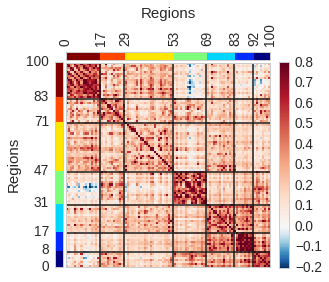

In [12]:

import matplotlib as mpl
dd=ts.vec2mat(list_conn_sites[5].mean(axis=1))

fig = plt.figure(figsize=(4, 4),dpi=150)
sns.set_context('paper',font_scale=1.7)

vis.mat(hc.ordermat(all_sites,ind_sub),[-0.2,0.8],True,False)
ax = plt.gca()
ax.grid(False)


def show_cluster(ind_sub,lw=1.5,color='w'):
    ax = plt.gca()
    # Use matplotlib directly to emphasize known networks
    networks = np.sort(ind_sub)
    for i, network in enumerate(networks):
        if i and network != networks[i-1]:
            ax.axhline(i, c=color, lw=lw)
            ax.axvline(i-1, c=color, lw=lw)

show_cluster(ind_sub,color='k')


cmap = plt.cm.jet
ax_bar = fig.add_axes([0.085, 0.16, 0.03, 0.71])
ax_bar_top = fig.add_axes([0.124,0.877 , 0.71,0.03])
#bounds = np.linspace(0, 100, 7)
bounds=[0]
for i in range(7,0,-1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)


#mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=np.sort(ind_sub), ticks=bounds ,boundaries=bounds,orientation='vertical')
cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
#ax_bar.get_yaxis().set_ticks([])
#ax_bar.grid(False)
ax_bar.set_ylabel('Regions')
ax_bar.yaxis.tick_left()
ax_bar.yaxis.set_label_position('left')


cmap = plt.cm.jet_r
bounds=[0]
for i in range(1,8,1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

cmm = mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
#ax_bar_top.get_xaxis().set_ticks([])
#ax_bar_top.grid(False)
ax_bar_top.set_xlabel('Regions')
ax_bar_top.xaxis.tick_top()
ax_bar_top.xaxis.set_label_position('top')
ll = ax_bar_top.get_xticklabels()
for label in ll:
    label.set_rotation(90)

#plt.savefig(main_path + 'figures/matrix_7net_multisite.pdf')
#plt.savefig(main_path + 'figures/matrix_7net_multisite.png')

In [13]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(256)]

# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds_sub = np.linspace(0, 100, 8)
bounds_sub = np.ceil(bounds_sub)

for i in range(1,len(bounds)):
    idx_t1 = int(np.round(256*(bounds_sub[i-1]/100.)))
    idx_t2 = int(np.round(256*(bounds_sub[i]/100.)))
    print cmap(idx_t1), idx_t1,idx_t2
    for j in range(idx_t1,idx_t2):
        
        if i==7:
            cmaplist[j]=cmap(idx_t2)
        elif i==6:
            cmaplist[j]=cmap(idx_t2)
        elif i==5:
            cmaplist[j]=cmap(idx_t2-15)
        elif i==4:
            cmaplist[j]=cmap(idx_t1+20)
        elif i==1:
            cmaplist[j]=cmap(idx_t1)
        else:
            cmaplist[j]=cmap(idx_t1)
            
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)   
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)



(0.0, 0.0, 0.5, 1.0) 0 38
(0.0, 0.096078431372549025, 1.0, 1.0) 38 74
(0.0, 0.66078431372548996, 1.0, 1.0) 74 110
(0.26249209361163817, 1.0, 0.70524984187223283, 1.0) 110 148
(0.74320050600885468, 1.0, 0.22454142947501621, 1.0) 148 184
(1.0, 0.69789397240377649, 0.0, 1.0) 184 220
(1.0, 0.1750181554103124, 0.0, 1.0) 220 256


In [14]:
ind_sub=ind_sub*1.

#vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)

nn_map = ts.vec2vol(data_dmn,im_ref.get_data())
im_over = nib.Nifti1Image(nn_map, im_ref.get_affine())

NameError: name 'data_dmn' is not defined

In [52]:
im_ref.get_data().max()

100.0

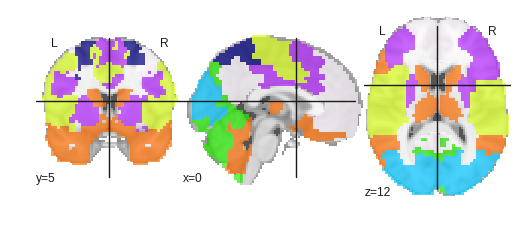

In [54]:
plotting.plot_roi(im_over)

In [17]:
import nibabel as nib
im_ref = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Nifti1Image(im_ref.get_data(), im_ref.get_affine())

anat_template = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    
fig = plt.figure()

data_dmn = 8-ind_sub#all_sites[hc.order(ind_sub==2),:].mean(axis=0)

#vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)

nn_map = ts.vec2vol(data_dmn,im_ref.get_data())
im_over = nib.Nifti1Image(nn_map, im_ref.get_affine())
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='z',
                             cut_coords=[-30,-20,0,20,30,45],
                             annotate=False,
                             draw_cross=False)

display.add_overlay(im_over,
                    colorbar=False,
                    vmin=0,
                    vmax=7,
                    cmap=cmap)

im_over.to_filename('/home/cdansereau/git/Projects/multisite/partition_7networks.nii.gz')
#plt.savefig(main_path + 'figures/map_7net_multisite.pdf')
#plt.savefig(main_path + 'figures/map_7net_multisite.png')


NameError: name 'plotting' is not defined

In [49]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(256)]

# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds_sub = np.linspace(0, 100, 8)
bounds_sub = np.ceil(bounds_sub)

for i in range(0,len(cmaplist)):
    if i>128:
        cmaplist[i] = (1.,0.,0.,1.0)
    else:
        cmaplist[i] = (0.,0.,0.,1.0)
    
            
# force the first color entry to be grey

cmap_br = cmap.from_list('Custom cmap', cmaplist, cmap.N)



In [41]:
cmaplist

[(0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (0.0, 0.0,

In [19]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(256)]

# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds_sub = np.linspace(0, 100, 3)
bounds_sub = np.ceil(bounds_sub)

for i in range(1,len(bounds)):
    idx_t1 = int(np.round(256*(bounds_sub[i-1]/100.)))
    idx_t2 = int(np.round(256*(bounds_sub[i]/100.)))
    print cmap(idx_t1), idx_t1,idx_t2
    for j in range(idx_t1,idx_t2):
        
        if i==7:
            cmaplist[j]=cmap(idx_t2)
        elif i==6:
            cmaplist[j]=cmap(idx_t2)
        elif i==5:
            cmaplist[j]=cmap(idx_t2-15)
        elif i==4:
            cmaplist[j]=cmap(idx_t1+20)
        elif i==1:
            cmaplist[j]=cmap(idx_t1)
        else:
            cmaplist[j]=cmap(idx_t1)
            
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)   
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

(0.0, 0.0, 0.5, 1.0) 0 128
(0.49019607843137247, 1.0, 0.47754585705249841, 1.0) 128 256


IndexError: index 3 is out of bounds for axis 0 with size 3

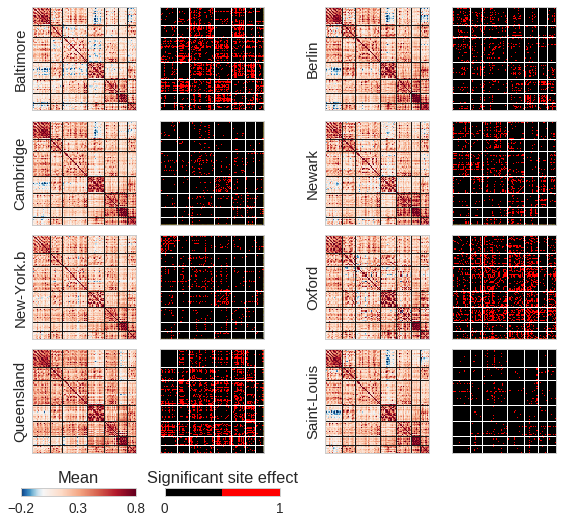

In [21]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    all_detect=[]
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 8),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites)/2,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,4):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(2*sidx,2*sidx+2):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean_tmp,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            ax1.get_yaxis().set_visible(True)
            ax1.get_yaxis().set_ticks([])
            plt.ylabel(site_names[site_diff_idx])
            #if sidx == 0:
                #plt.title('Mean')
            
           
            ax3 = plt.subplot(grid2[:,shift_col+1])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                tmp_x = sm.tools.add_constant(demog_data[k])
                if k==site_diff_idx:
                    if len(x_)==0:
                        contrast = np.ones(tmp_x.shape[0])
                        x_ = tmp_x
                    else:
                        contrast = np.hstack((contrast,np.ones(tmp_x.shape[0])))
                        x_ = np.vstack((x_,tmp_x))
                else:
                    if len(x_)==0:
                        contrast = np.zeros(tmp_x.shape[0])
                        x_ = tmp_x
                    else:
                        contrast = np.hstack((contrast,np.zeros(tmp_x.shape[0])))
                        x_ = np.vstack((x_,tmp_x))
                        
            #np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #x_ = np.vstack((x_1,x_2))
            #contrast = np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #print contrast.shape,x_.shape
            x_ = np.hstack((contrast[:,np.newaxis],x_))
            pval = []
            #print conn_vec_tmp.shape
            for nn in range(conn_vec_tmp.shape[0]):
                y_ = conn_vec_tmp[nn,:]
                glm_ = sm.GLM(y_, x_)
                res = glm_.fit()
                #print(res.summary())
                pval.append(res.pvalues[0])
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            
            all_detect.append(rejected)
            #print conn_vec_tmp.shape
            site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            #site_mean, site_std = get_stats(detrended_conn[sidx-1].T)
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.05, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Mean')

    '''
    # include the color bars 3
    lim = lim_mean_diff
    cmap = cm.gray
    ax_bar = fig.add_axes([0.38, 0.05, 0.20, 0.015])
    bounds = np.linspace(lim[0], lim[1], 3)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
    mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds ,boundaries=bounds,orientation='horizontal')
    #vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    '''
    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.3, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant site effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2.png')
    
    return all_matrix,all_detect
                

all_matrix,all_detect = gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



In [33]:
cmap_br

## new stats using nistats

# difference with FD

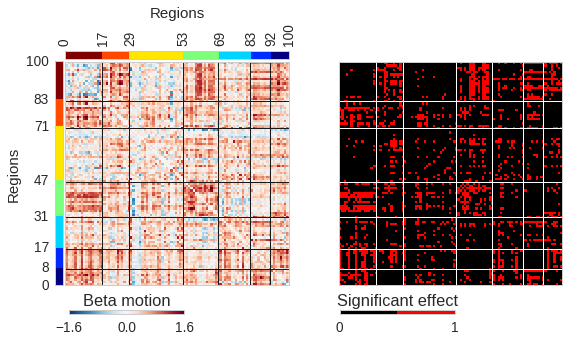

In [64]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn import preprocessing

from nistats import glm as nsglm

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Effect of age']
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 4),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(1,1, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,1):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(1):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
            x_[:,1] = preprocessing.scale(x_[:,1])      
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==site_diff_idx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)  
            contrast = np.array([ 1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

            pval = []
            
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            #site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            site_mean = ts.vec2mat(cont_results.effect[0,:],0)
            
            lim_mean = [-round(np.max(site_mean),1),round(np.max(site_mean),1)]
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            
            cmap = plt.cm.jet
            ax_bar = fig.add_axes([0.075, 0.125, 0.015, 0.78])
            ax_bar_top = fig.add_axes([0.0925,0.91 , 0.39,0.03])
            #bounds = np.linspace(0, 100, 7)
            bounds=[0]
            for i in range(7,0,-1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
            cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
            ax_bar.set_ylabel('Regions')
            ax_bar.yaxis.tick_left()
            ax_bar.yaxis.set_label_position('left')
            
            cmap = plt.cm.jet_r
            bounds=[0]
            for i in range(1,8,1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

            cmm = mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
            ax_bar_top.set_xlabel('Regions')
            ax_bar_top.xaxis.tick_top()
            ax_bar_top.xaxis.set_label_position('top')
            ll = ax_bar_top.get_xticklabels()
            for label in ll:
                label.set_rotation(90)
            
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
    

    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.10, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Beta motion')

    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.57, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2_motion.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2_motion.png')
    
    
    return all_matrix
                

all_matrix = gen_fig(list_conn_sites)



# difference with Age

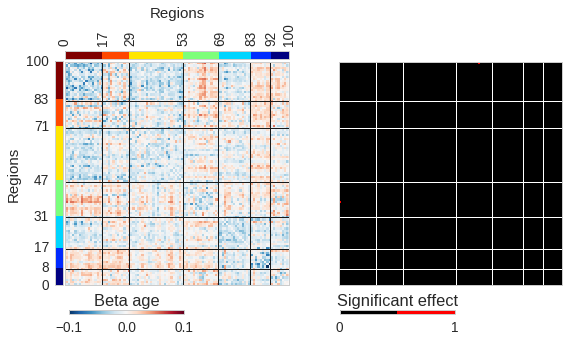

In [65]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn import preprocessing

from nistats import glm as nsglm

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Effect of age']
    #lim_mean = [-0.01,0.01]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 4),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(1,1, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,1):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(1):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
            x_[:,1] = preprocessing.scale(x_[:,1])      
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==site_diff_idx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)  
            contrast = np.array([ 0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.])

            pval = []
            
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            #site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            site_mean = ts.vec2mat(cont_results.effect[0,:],0)
            
            lim_mean = [-round(np.max(site_mean),1),round(np.max(site_mean),1)]
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            
            cmap = plt.cm.jet
            ax_bar = fig.add_axes([0.075, 0.125, 0.015, 0.78])
            ax_bar_top = fig.add_axes([0.0925,0.91 , 0.39,0.03])
            #bounds = np.linspace(0, 100, 7)
            bounds=[0]
            for i in range(7,0,-1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
            cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
            ax_bar.set_ylabel('Regions')
            ax_bar.yaxis.tick_left()
            ax_bar.yaxis.set_label_position('left')
            
            cmap = plt.cm.jet_r
            bounds=[0]
            for i in range(1,8,1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

            cmm = mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
            ax_bar_top.set_xlabel('Regions')
            ax_bar_top.xaxis.tick_top()
            ax_bar_top.xaxis.set_label_position('top')
            ll = ax_bar_top.get_xticklabels()
            for label in ll:
                label.set_rotation(90)
            
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
    

    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.10, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Beta age')

    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.57, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2_age.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2_age.png')
    
    
    return all_matrix
                

all_matrix = gen_fig(list_conn_sites)



# difference with Sex

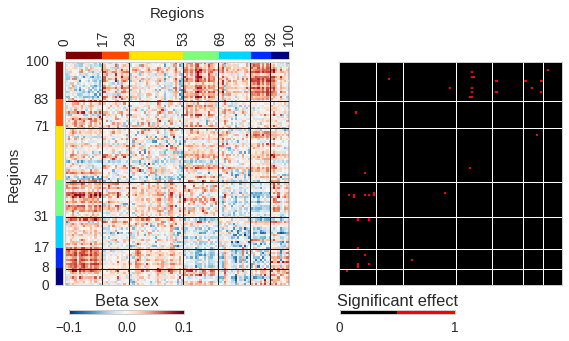

In [66]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn import preprocessing

from nistats import glm as nsglm

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Effect of motion']
    lim_mean = [-0.1,0.1]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 4),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(1,1, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,1):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(1):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean_tmp,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            ax1.get_yaxis().set_visible(True)
            ax1.get_yaxis().set_ticks([])
            ax1.set_ylabel(site_names[site_diff_idx])
            #if sidx == 0:
                #plt.title('Mean')
            
           
            ax3 = plt.subplot(grid2[:,shift_col+1])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
            x_[:,1] = preprocessing.scale(x_[:,1])      
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==site_diff_idx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)  
            contrast = np.array([ 0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.])

            pval = []
            
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            #site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            site_mean = ts.vec2mat(cont_results.effect[0,:],0)
            
            lim_mean = [-round(np.max(site_mean),1),round(np.max(site_mean),1)]
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            
            cmap = plt.cm.jet
            ax_bar = fig.add_axes([0.075, 0.125, 0.015, 0.78])
            ax_bar_top = fig.add_axes([0.0925,0.91 , 0.39,0.03])
            #bounds = np.linspace(0, 100, 7)
            bounds=[0]
            for i in range(7,0,-1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
            cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
            ax_bar.set_ylabel('Regions')
            ax_bar.yaxis.tick_left()
            ax_bar.yaxis.set_label_position('left')
            
            cmap = plt.cm.jet_r
            bounds=[0]
            for i in range(1,8,1):
                    bounds.append(bounds[-1] + np.sum(ind_sub==i))

            norm = mpl.colors.BoundaryNorm(bounds,cmap.N)

            cmm = mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
            ax_bar_top.set_xlabel('Regions')
            ax_bar_top.xaxis.tick_top()
            ax_bar_top.xaxis.set_label_position('top')
            ll = ax_bar_top.get_xticklabels()
            for label in ll:
                label.set_rotation(90)
            
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
    

    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.10, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Beta sex')

    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.57, 0.025, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2_sex.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2_sex.png')
    
    
    return all_matrix
                

all_matrix = gen_fig(list_conn_sites)



In [47]:
list_conn_sites[3].shape

(4950, 16)

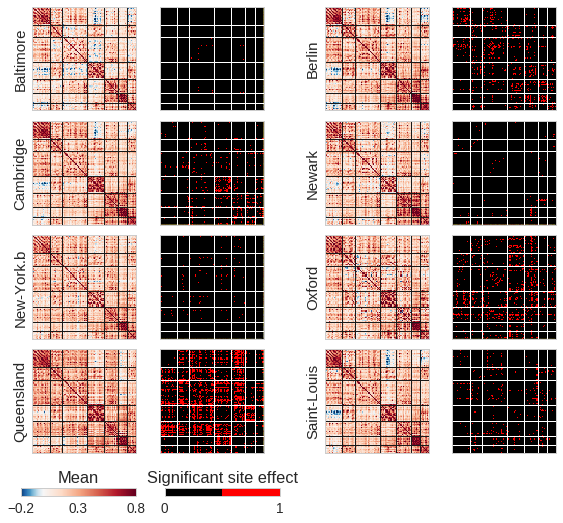

In [60]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model

from nistats import glm as nsglm
from sklearn import preprocessing


from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    all_detect=[]
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 8),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites)/2,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,4):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(2*sidx,2*sidx+2):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean_tmp,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            ax1.get_yaxis().set_visible(True)
            ax1.get_yaxis().set_ticks([])
            ax1.set_ylabel(site_names[site_diff_idx])
            #if sidx == 0:
                #plt.title('Mean')
            
           
            ax3 = plt.subplot(grid2[:,shift_col+1])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
            x_[:,1] = preprocessing.scale(x_[:,1])   
            #x_ = np.hstack((np.ones_like(x_[:,0]).reshape(-1,1),x_[:,:-1]))
            #print x_[:,:2].shape
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==site_diff_idx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)          

            #np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #x_ = np.vstack((x_1,x_2))
            #contrast = np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #print contrast.shape,x_.shape
            #x_ = np.hstack((contrast[:,np.newaxis],x_))
            pval = []
            
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            #for nn in range(conn_vec_tmp.shape[0]):
            #    y_ = conn_vec_tmp[nn,:]
            #    glm_ = sm.GLM(y_, x_)
            #    res = glm_.fit()
                #print(res.summary())
            #    pval.append(res.pvalues[0])
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            all_detect.append(rejected)
            #print conn_vec_tmp.shape
            site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            #site_mean, site_std = get_stats(detrended_conn[sidx-1].T)
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.05, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Mean')

    '''
    # include the color bars 3
    lim = lim_mean_diff
    cmap = cm.gray
    ax_bar = fig.add_axes([0.38, 0.05, 0.20, 0.015])
    bounds = np.linspace(lim[0], lim[1], 3)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
    mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds ,boundaries=bounds,orientation='horizontal')
    #vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    '''
    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.3, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant site effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2.png')
    
    return all_matrix,all_detect
                

all_matrix,all_detect = gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



256


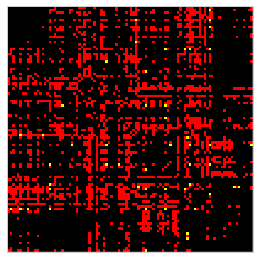

In [116]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(256)]

# create the new map
#cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds_sub = np.linspace(0, 100, 8)
bounds_sub = np.ceil(bounds_sub)

for i in range(0,len(cmaplist)):
    if i>1:
        cmaplist[i] = (1.,0.,0.,1.0)
    else:
        cmaplist[i] = (0.,0.,0.,1.0)
    if i > 128:
        cmaplist[i] = (1.,1.,0.,1.0)
    
            
# force the first color entry to be grey
print len(cmaplist)
cmap_bry = cmap.from_list('Custom cmap', cmaplist, cmap.N)



all_sites = ts.vec2mat(np.hstack((list_conn_sites)).mean(1))
order = hc.hclustering(all_sites,7)
coded_mat = np.zeros_like(all_detect[0])
coded_mat = np.logical_and(all_detect[6],all_detect[6])*0.5 # converging
coded_mat = coded_mat+np.logical_and(all_detect[6],all_detect[2])*1.5 # diverging
vis.mat(hc.ordermat(coded_mat ,order),[0,2],False,False,cm=cmap_bry)

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [ True,  True, False, ...,  True, False, False],
       ..., 
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [93]:
((all_detect[6]+all_detect[6]+all_detect[2])==3).sum()

50

0
Baltimore
[ 0.          0.          0.          1.         -0.20472441 -0.12598425
 -0.14173228 -0.1496063  -0.13385827 -0.24409449]
0 20.0 48.0
0 [ 0.  1.] [ 0.  1.]
9.0
16.0
1
Berlin
[ 0.          0.          0.         -0.17213115  1.         -0.13114754
 -0.14754098 -0.1557377  -0.13934426 -0.25409836]
1 750.0 1186.0
1 [ 0.  1.] [ 0.  1.]
318.0
332.0
2
Cambridge
[ 0.          0.          0.          0.44680851  0.55319149  0.34042553
  0.38297872  0.40425532  0.36170213  0.65957447]
2 502.0 6400.0
2 [ 0.  1.] [ 0.  1.]
147.0
3157.0
3
Newark
[ 0.          0.          0.         -0.15909091 -0.1969697   1.
 -0.13636364 -0.14393939 -0.12878788 -0.23484848]
3 94.0 70.0
3 [ 0.  1.] [ 0.  1.]
23.0
36.0
4
New-York.b
[ 0.          0.          0.         -0.16153846 -0.2        -0.12307692
  1.         -0.14615385 -0.13076923 -0.23846154]
4 98.0 92.0
4 [ 0.  1.] [ 0.  1.]
25.0
45.0
5
Oxford
[ 0.          0.          0.         -0.1627907  -0.20155039 -0.12403101
 -0.13953488  1.         -

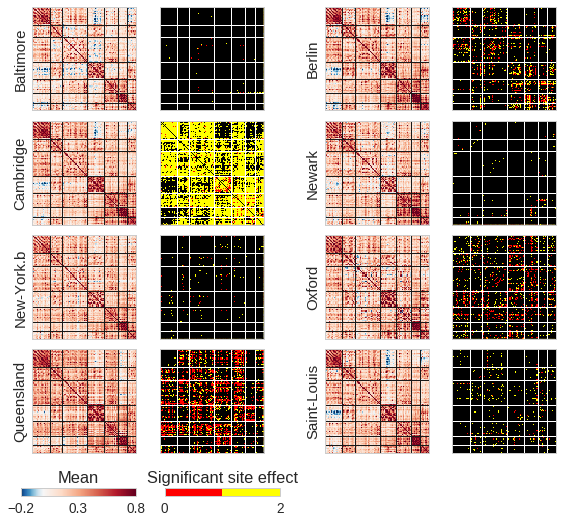

In [149]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model

from nistats import glm as nsglm
from sklearn import preprocessing

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites,all_detect):
    idx_all_detect=0
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 8),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites)/2,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,4):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(2*sidx,2*sidx+2):
            print site_diff_idx
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean_tmp,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            ax1.get_yaxis().set_visible(True)
            ax1.get_yaxis().set_ticks([])
            ax1.set_ylabel(site_names[site_diff_idx])
            print site_names[site_diff_idx]
            #if sidx == 0:
                #plt.title('Mean')
            
           
            ax3 = plt.subplot(grid2[:,shift_col+1])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    if k!=2:
                        conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            k=0
            for ii in range(0,len(demog_data)):
                
                #tmp_x = sm.tools.add_constant(demog_data[k])
                if ii!=2:
                    tmp_x = demog_data[ii]
                    if len(x_)==0:
                        contrast = np.zeros((tmp_x.shape[0],7))
                        contrast[:,k] = 1
                        x_ = np.hstack((tmp_x,contrast))
                    else:
                        contrast_tmp = np.zeros((tmp_x.shape[0],7))
                        contrast_tmp[:,k] = 1
                        contrast = np.vstack((contrast,contrast_tmp))
                        tmp_x = np.hstack((tmp_x,contrast_tmp))
                        x_ = np.vstack((x_,tmp_x))
                    k+=1
                    
            x_[:,1] = preprocessing.scale(x_[:,1])   
            
            #print x_[:,:2].shape
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                if k!=2:
                    if k==site_diff_idx:
                        contrast.append(1)
                    else:
                        num = demog_data[k].shape[0]
                        
                        denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                        contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)          

            print contrast
            #np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #x_ = np.vstack((x_1,x_2))
            #contrast = np.hstack((np.ones(x_1.shape[0]),np.zeros(x_2.shape[0])))
            #print contrast.shape,x_.shape
            #x_ = np.hstack((contrast[:,np.newaxis],x_))
            pval = []
            
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            #for nn in range(conn_vec_tmp.shape[0]):
            #    y_ = conn_vec_tmp[nn,:]
            #    glm_ = sm.GLM(y_, x_)
            #    res = glm_.fit()
                #print(res.summary())
            #    pval.append(res.pvalues[0])
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            #site_mean, site_std = get_stats(detrended_conn[sidx-1].T)
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            coded_mat = np.zeros_like(rejected)
            print idx_all_detect,all_detect[idx_all_detect].sum(),rejected.sum()
            print idx_all_detect,np.unique(all_detect[idx_all_detect]),np.unique(rejected)
            #coded_mat = rejected*1.5
            coded_mat = np.logical_xor(all_detect[idx_all_detect],rejected)*1.5 # diverging
            
            coded_mat = coded_mat+np.logical_and(all_detect[idx_all_detect],rejected)*0.5 # converging
            print np.logical_and(all_detect[idx_all_detect],rejected).sum()/2.
            print np.logical_xor(all_detect[idx_all_detect],rejected).sum()/2.
            vis.mat(hc.ordermat(coded_mat ,order),[0,2],False,False,cm=cmap_bry)
            show_cluster(order,1)
            #if sidx == 0:
                #plt.title('Significant site effect')
            
                #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            #print((site_mean - site_mean_tmp).min(), (site_mean - site_mean_tmp).max())
            
            col_idx = 1
            idx_all_detect+=1
    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.05, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Mean')

    '''
    # include the color bars 3
    lim = lim_mean_diff
    cmap = cm.gray
    ax_bar = fig.add_axes([0.38, 0.05, 0.20, 0.015])
    bounds = np.linspace(lim[0], lim[1], 3)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
    mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds ,boundaries=bounds,orientation='horizontal')
    #vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    '''
    #red_patch = mpatches.Patch(color='red',label='Mean')
    #plt.legend(bbox_to_anchor=(3.5,3.),handles=[red_patch])
    ax_bar = fig.add_axes([0.3, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_bry, [0,2],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant site effect')
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_multisite2_no_cambridge.pdf')
    plt.savefig(main_path + 'figures/connectome_multisite2_no_cambridge.png')
    
    return all_matrix
                

all_matrix = gen_fig(list_conn_sites,all_detect)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)
print 'no cambridge!!!'


In [126]:
reload(hc)

<module 'proteus.predic.clustering' from '/home/cdansereau/git/Proteus/proteus/predic/clustering.py'>

NameError: global name 'show_cluster' is not defined

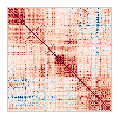

In [6]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *
import matplotlib.patches as mpatches
from sklearn import linear_model

from nistats import glm as nsglm

from nilearn import plotting
reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    all_sites=[]
    all_matrix = []
    for sidx in range(0,len(list_conn_sites)):

            conn_vec = list_conn_sites[sidx]
            if sidx == 0:
                all_sites = conn_vec
            else:
                all_sites = np.hstack((all_sites,conn_vec))

    all_sites = all_sites.mean(axis=1)
    all_sites = ts.vec2mat(all_sites)
    order = hc.hclustering(all_sites,7)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(8, 8),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites)/2,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.15, hspace=0.1, left=0.05, right=1.)
    for sidx in range(0,1):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(0,1):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.001)

            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            ax1 = plt.subplot(grid2[:,shift_col])
            vis.mat(hc.ordermat(site_mean_tmp,order),lim_mean,False,False)
            show_cluster(order,1,color='k')
            ax1.get_yaxis().set_visible(True)
            ax1.get_yaxis().set_ticks([])
            ax1.set_ylabel(site_names[site_diff_idx])
            #if sidx == 0:
                #plt.title('Mean')
            
           
            ax3 = plt.subplot(grid2[:,shift_col+1])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            
            ## difference computation
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
            x_[:,1] = preprocessing.scale(x_[:,1])   
            x_ = np.hstack((np.ones_like(x_[:,0]).reshape(-1,1),x_))
            #print x_[:,:2].shape
            contrast=[0,0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==site_diff_idx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[site_diff_idx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)          

            
            pval = []
            print x_[:,:4].shape,x_[:,-8:].shape
            
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_[:,:4])
            
            
            ## take residual squared
            set_val = np.unique(labels)
            aa=[]
            for ii in range(len(set_val)):
                aa.append(regression_result[set_val[ii]].resid)

            aa=np.hstack(aa)**2 
            aa = aa - np.mean(aa,0)
            print aa.shape
            test_res=[]
            for ii in range(aa.shape[1]):
                test_res.append(sm.stats.diagnostic.het_white(aa[:,ii],x_[:,-8:])[3])
            test_res=np.array(test_res)
            
            rejected , pvaluecorrected = smm.multipletests(test_res, alpha=0.05, method='fdr_bh')[:2]
            print test_res
            return [test_res,rejected , pvaluecorrected,conn_vec_tmp.T,x_[:,:4],x_[:,-8:]]
            # perform white f-test
            
            
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            #return [labels,regression_result,x_,contrast]
            pval = cont_results.p_value()
            
            pval = np.array(pval)
            #conn_vec_tmp = detrended_conn[site_diff_idx]
            #t,pval = stats.ttest_ind(detrended_conn[sidx-1],conn_vec_tmp, axis=0, equal_var = False)
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            all_matrix.append(rejected)
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            #site_mean, site_std = get_stats(detrended_conn[sidx-1].T)
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(np.abs(site_mean - site_mean_tmp),order),lim_mean,False,False)
            vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False,cm=cmap_br)
            show_cluster(order,1)
            
            col_idx = 1
    

    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.05, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Mean')

    ax_bar = fig.add_axes([0.3, 0.05, 0.20, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant site effect')
    #fig.tight_layout()
    #plt.savefig(main_path + 'figures/connectome_multisite2.pdf')
    #plt.savefig(main_path + 'figures/connectome_multisite2.png')
    
    return all_matrix
                

all_matrix = gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)

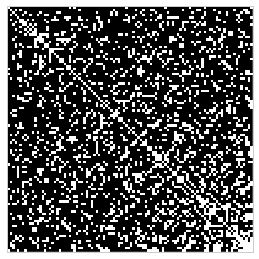

In [506]:
vis.mat(ts.vec2mat(all_matrix[1]),show_axis=False,cbar=False)
cax=plt.gca()
plt.grid(False)
#cbar = fig.colorbar(cax, ticks=[0, 1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1']) 

In [85]:
print len(all_matrix[1])
all_matrix[1][0.05].resid.shape

37


(343, 140)

In [121]:
mdict = {'Y':all_matrix[-3],'x1':all_matrix[-2],'x2':all_matrix[-1]}
scipy.io.savemat('model_input.mat',mdict)

In [133]:
set_val = np.unique(all_matrix[0])
aa=[]
for ii in range(len(set_val)):
    aa.append(all_matrix[1][set_val[ii]].resid)
    
aa=np.hstack(aa)**2
test_res=[]
for ii in range(aa.shape[1]):
    test_res.append(sm.stats.diagnostic.het_white(aa[:,ii],all_matrix[2])[3])
test_res=np.array(test_res)

In [134]:

(test_res<0.05).sum()

1797

In [135]:
test_res.shape 1501/4950

(4950,)

In [136]:
rejected , pvaluecorrected = smm.multipletests(test_res, alpha=0.05, method='fdr_bh')[:2]

In [137]:
rejected.sum()

1501

In [98]:
all_matrix[2].shape

(343, 11)

In [107]:
np.hstack((np.ones_like(all_matrix[2][:,0]).reshape(-1,1),all_matrix[2][:,:-1])).shape

(343, 11)

In [154]:
import glob,os
import nibabel as nib
#list_of_files = glob.glob("/media/cdansereau/database1/data/adni2/fmri_preprocess/fmri/*.mnc.gz")
list_of_files = glob.glob("/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/*.mnc.gz")



In [131]:
list_of_files[ii][:-7]+"_extra.mat"

'/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub37548_session1_rest_extra.mat'

In [127]:
list_of_files

['/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub37548_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub77572_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub94042_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub96234_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub91622_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub90658_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub54329_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub76160_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub29158_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000/Baltimore/fmri/fmri_sub31837_session1_rest.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1

In [150]:
img_part = nib.load("/home/cdansereau/data/multisite/connectomes_multisite_corrseeds/network_basc.mnc")
img_part.shape

(52, 64, 53)

100.0

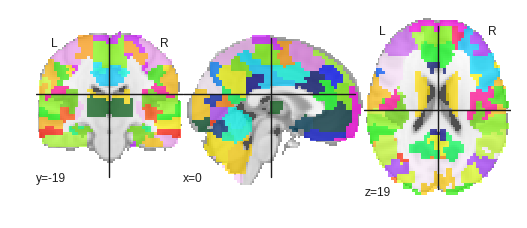

In [152]:
plotting.plot_roi(img_part)

img_part.get_data().max()

In [212]:
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000/*")
list_of_sites[0]

'/home/cdansereau/data/multisite/fcon_1000/Baltimore'

In [250]:
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/*.gz")
#tab = pd.read_csv(list_of_sites[ss],sep='\t')
#wm_avg

list_of_sites

['/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub73399_session1_rest_n.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub20389_session1_rest_n.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub69287_session1_rest_n.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub13902_session1_rest_n_confounds.tsv.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub50454_session1_rest_n_confounds.tsv.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub16846_session1_rest_n_confounds.tsv.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub52036_session1_rest_n.mnc.gz',
 '/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Cambridge/resample/fmri_sub93609_session1_rest_n_confounds.tsv.gz',
 '/home/

In [251]:
print tab.keys()

Index([u'motion_tx', u'motion_ty', u'motion_tz', u'motion_rx', u'motion_ry',
       u'motion_rz', u'FD', u'scrub', u'slow_drift', u'slow_drift.1',
       u'slow_drift.2', u'slow_drift.3', u'slow_drift.4', u'slow_drift.5',
       u'slow_drift.6', u'wm_avg', u'vent_avg', u'global_signal_pca',
       u'compcor', u'compcor.1', u'compcor.2', u'compcor.3', u'compcor.4'],
      dtype='object')


In [375]:
from sklearn.linear_model import LinearRegression
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/*")
res_sites=[]
for ss in range(len(list_of_sites)):
    list_of_files = glob.glob(list_of_sites[ss]+"/resample/*.mnc.gz")
    res_data=[]
    for ii in range(len(list_of_files)):
        img_vol = nib.load(list_of_files[ii])
        img_vol = np.swapaxes(img_vol.get_data()[...,np.newaxis],0,4)[0,...]
        print img_vol.shape
        if img_vol.shape[3]!=40:
            print img_vol.shape[3]
            ts_gm = ts.get_ts(img_vol,img_part.get_data()).mean(0)
            print ts_gm.shape
            file_extra = glob.glob(list_of_files[ii][:-7]+"_confounds.tsv.gz")[0]
            print file_extra
            extra = pd.read_csv(file_extra,sep='\t')#scipy.io.loadmat(mat_extra)
            if np.sum(extra['scrub'].values==0) > 40:
                Xmotion = extra.iloc[:,0:6].values
                Xdrift  = extra.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13]].values#extra.iloc[:,8:14]
                print Xdrift.shape,ts_gm.shape
                ## Train
                lreg_d = LinearRegression(fit_intercept=True)
                lreg_d.fit(Xdrift,ts_gm)
                new_ts = (ts_gm-lreg_d.predict(Xdrift))

                wm = extra['wm_avg'].values
                vent = extra['vent_avg'].values
                #lreg_wm = LinearRegression(fit_intercept=True)
                #lreg_wm.fit(Xdrift,wm)
                #new_wm = (wm-lreg_wm.predict(Xdrift))



                gm_wm = ts.corr(wm,new_ts[np.newaxis,...])[0][0]
                gm_vent = ts.corr(vent,new_ts[np.newaxis,...])[0][0]
                #gm_csf = ts.corr(extra['vent_avg'].values,new_ts[np.newaxis,...])[0][0]
                #wm_csf = ts.corr(extra['vent_avg'].values,extra['wm_avg'].values[np.newaxis,...])[0][0]
                res_data.append([gm_wm,gm_vent])
                print res_data[-1]
    res_sites.append(np.array(res_data))

(52, 64, 53, 123)
123
(123,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Baltimore/resample/fmri_sub90893_session1_rest_n_confounds.tsv.gz
(123, 12) (123,)
[0.76620104104198417, 0.66228270315480442]
(52, 64, 53, 123)
123
(123,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Baltimore/resample/fmri_sub31837_session1_rest_n_confounds.tsv.gz
(123, 12) (123,)
[0.17317189837823688, -0.12410156579611244]
(52, 64, 53, 123)
123
(123,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Baltimore/resample/fmri_sub90658_session1_rest_n_confounds.tsv.gz
(123, 12) (123,)
[0.67525655280877672, 0.27237921923163894]
(52, 64, 53, 123)
123
(123,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Baltimore/resample/fmri_sub80221_session1_rest_n_confounds.tsv.gz
(123, 12) (123,)
[0.30304145990856235, 0.14585019492649193]
(52, 64, 53, 123)
123
(123,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Baltimore/resample/fmri_sub30072_session1_rest_n_confou

(52, 64, 53, 135)
135
(135,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Newark/resample/fmri_sub58526_session1_rest_n_confounds.tsv.gz
(135, 12) (135,)
[[  1.00000000e+00   2.18147548e-15]
 [  2.18147548e-15   1.00000000e+00]]
2.18147547993e-15
(52, 64, 53, 135)
135
(135,)
/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/Newark/resample/fmri_sub62985_session1_rest_n_confounds.tsv.gz
(135, 12) (135,)
[[  1.00000000e+00   4.99822862e-15]
 [  4.99822862e-15   1.00000000e+00]]
4.99822862492e-15


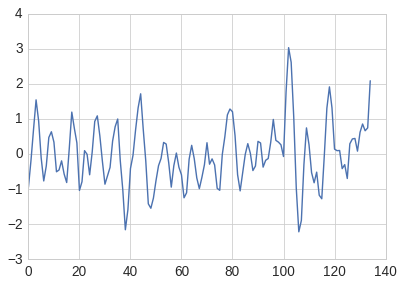

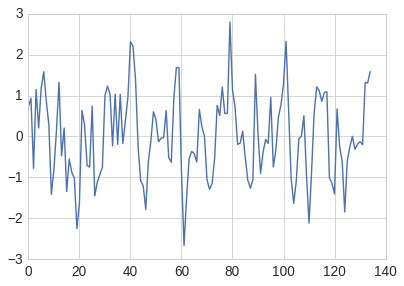

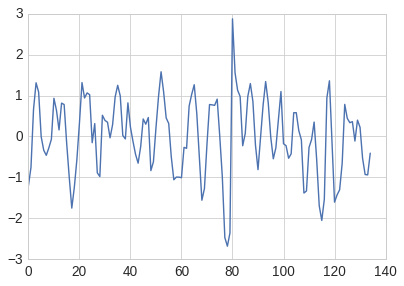

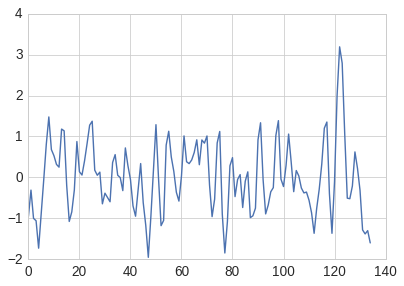

In [363]:
from sklearn.linear_model import LinearRegression
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000_preprocess_noreg/*")
res_sites=[]
for ss in [6]:
    list_of_files = glob.glob(list_of_sites[ss]+"/resample/*.mnc.gz")
    res_data=[]
    for ii in range(2):
        img_vol = nib.load(list_of_files[ii])
        img_vol = np.swapaxes(img_vol.get_data()[...,np.newaxis],0,4)[0,...]
        print img_vol.shape
        if img_vol.shape[3]!=40:
            print img_vol.shape[3]
            ts_gm = ts.get_ts(img_vol,img_part.get_data()).mean(0)
            print ts_gm.shape
            file_extra = glob.glob(list_of_files[ii][:-7]+"_confounds.tsv.gz")[0]
            print file_extra
            extra = pd.read_csv(file_extra,sep='\t')#scipy.io.loadmat(mat_extra)
            if np.sum(extra['scrub'].values==0) > 40:
                Xmotion = extra.iloc[:,0:6].values
                Xdrift  = extra.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13]].values#extra.iloc[:,8:14]
                print Xdrift.shape,ts_gm.shape
                ## Train
                lreg_d = LinearRegression(fit_intercept=True)
                lreg_d.fit(Xdrift,ts_gm)
                new_ts = (ts_gm-lreg_d.predict(Xdrift))

                wm = extra['wm_avg'].values
                vent = extra['vent_avg'].values
                #lreg_wm = LinearRegression(fit_intercept=True)
                #lreg_wm.fit(Xdrift,wm)
                #new_wm = (wm-lreg_wm.predict(Xdrift))
                plt.figure()
                plt.plot(wm)
                
                plt.figure()
                plt.plot(new_ts)


                print np.corrcoef(wm,new_ts)

                gm_wm = ts.corr(wm,new_ts[np.newaxis,...])[0][0]
                #gm_csf = ts.corr(extra['vent_avg'].values,new_ts[np.newaxis,...])[0][0]
                #wm_csf = ts.corr(extra['vent_avg'].values,extra['wm_avg'].values[np.newaxis,...])[0][0]
                res_data.append(gm_wm)
                print res_data[-1]
    #res_sites.append(np.array(res_data))

In [247]:
from sklearn.linear_model import LinearRegression
labels_ = ['Baltimore','Cambridge','NewYork_b','Queensland','SaintLouis','Newark','Berlin','Oxford']
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000/*")
res_sites=[]
for ss in range(len(labels_)):
    list_of_files = glob.glob(list_of_sites[ss]+"/fmri/*.mnc.gz")
    covs=[]
    
    #for ii in range(2):
    for ii in range(len(list_of_files)):
        img_vol = nib.load(list_of_files[ii])
        img_vol = np.swapaxes(img_vol.get_data()[...,np.newaxis],0,4)[0,...]
        print img_vol.shape
        if img_vol.shape[3]!=40:
            print img_vol.shape[3]
            ts_gm = ts.get_ts(img_vol,img_part.get_data())
            covs.append(np.mean(np.std(ts_gm,1)/np.mean(ts_gm,1)))
            break
    res_sites.append(np.hstack(covs)/np.mean(covs))
            

(52, 64, 53, 105)
105
(52, 64, 53, 115)
115
(52, 64, 53, 171)
171
(52, 64, 53, 145)
145
(52, 64, 53, 122)
122
(52, 64, 53, 127)
127
(52, 64, 53, 195)
195
(52, 64, 53, 126)
126


In [243]:
from sklearn.linear_model import LinearRegression
labels_ = ['Baltimore','Cambridge','NewYork_b','Queensland','SaintLouis','Newark','Berlin','Oxford']
list_of_sites = glob.glob("/home/cdansereau/data/multisite/fcon_1000/*")
#res_sites=[]
for ss in range(len(labels_)):
    list_of_files = glob.glob(list_of_sites[ss]+"/fmri/*.mnc.gz")
    covs=[]
    
    #for ii in range(2):
    for ii in range(len(list_of_files)):
        img_vol = nib.load(list_of_files[ii])
        img_vol = np.swapaxes(img_vol.get_data()[...,np.newaxis],0,4)[0,...]
        print img_vol.shape
        if img_vol.shape[3]!=40:
            print img_vol.shape[3]
            ts_gm = ts.get_ts(img_vol,img_part.get_data())
            print np.std(ts_gm,1).mean(),np.mean(ts_gm,1).mean()
            covs.append(np.mean(np.std(ts_gm,1)/np.mean(ts_gm,1)))
            break
    
            

(52, 64, 53, 105)
105
2.00631 674.793
(52, 64, 53, 115)
115
2.1422 903.422


KeyboardInterrupt: 

In [215]:
res_sites_all = res_sites

In [192]:
for dat_ in res_sites:
    print np.mean(dat_),np.std(dat_)

0.00276585 0.00109929
0.00240828 0.000913687
0.00800623 0.032957
0.0043807 0.207554
0.00216328 0.00105577
0.00441476 0.0339234
0.00226463 0.000791249
0.005284 0.0154988


In [234]:
# F-test
res = np.ones((len(res_sites),len(res_sites)))
for i1 in range(len(res_sites)):
    for i2 in range(len(res_sites)):
        if i1 != i2:
            #print i1,i2
            df1 = len(res_sites[i1]) - 1
            df2 = len(res_sites[i2]) - 1
            F = np.std(res_sites[i1])/np.std(res_sites[i2])
            p_value = scipy.stats.f.sf(F, df1, df2)
            res[i1,i2] = p_value
        #print np.mean(dat_),np.std(dat_)
        
print res
res < 0.05

[[  1.00000000e+00   6.35230901e-01   1.00000000e+00   9.99999994e-01
    5.45149824e-01   1.00000000e+00   3.80273705e-01   1.00000000e+00]
 [  3.64769101e-01   1.00000000e+00   1.00000000e+00   1.00000000e+00
    4.03028230e-01   1.00000000e+00   2.17614309e-01   1.00000000e+00]
 [  1.11776905e-14   2.77821707e-70   1.00000000e+00   3.81861506e-03
    3.60560288e-19   5.57766617e-02   1.56502967e-17   2.08833711e-02]
 [  5.51367645e-09   2.86523727e-29   9.96181386e-01   1.00000000e+00
    3.64067259e-11   8.61925635e-01   9.73553473e-11   7.78551889e-01]
 [  4.54850136e-01   5.96971772e-01   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   3.25925374e-01   1.00000000e+00]
 [  3.98676956e-11   3.52739055e-42   9.44223334e-01   1.38074365e-01
    4.07194156e-14   1.00000000e+00   2.80453208e-13   3.58850419e-01]
 [  6.19726315e-01   7.82385699e-01   1.00000000e+00   1.00000000e+00
    6.74074635e-01   1.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  1.2607208

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [ True,  True, False,  True,  True, False,  True,  True],
       [ True,  True, False, False,  True, False,  True, False],
       [False, False, False, False, False, False, False, False],
       [ True,  True, False, False,  True, False,  True, False],
       [False, False, False, False, False, False, False, False],
       [ True,  True, False, False,  True, False,  True, False]], dtype=bool)

In [246]:
scipy.stats.levene(*res_sites,center='median')
#scipy.stats.bartlett(*res_sites)

LeveneResult(statistic=3.7208372492097079, pvalue=0.00067285649916772581)

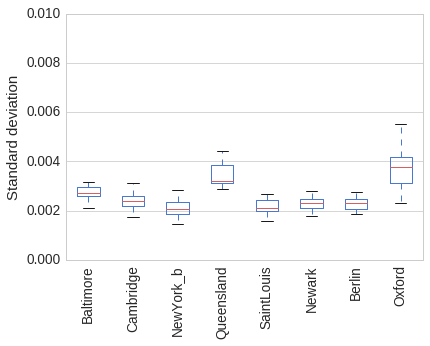

In [245]:


fig=plt.figure()
ax = plt.gca()
labels_ = ['Baltimore','Cambridge','NewYork_b','Queensland','SaintLouis','Newark','Berlin','Oxford']
plt.boxplot(res_sites,labels=labels_)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel('Standard deviation')
plt.ylim(0,0.01)


ax.xaxis.grid(False)

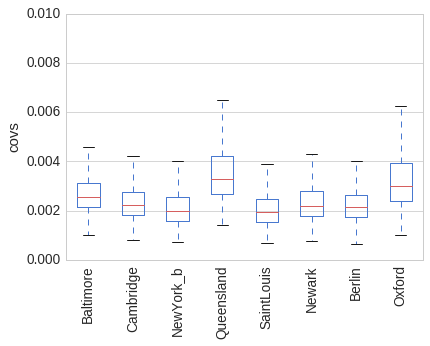

In [195]:


fig=plt.figure()
ax = plt.gca()
labels_ = ['Baltimore','Cambridge','NewYork_b','Queensland','SaintLouis','Newark','Berlin','Oxford']
plt.boxplot(res_sites_all,labels=labels_)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel('covs')
plt.ylim(0,0.01)


ax.xaxis.grid(False)

In [167]:
a= np.std(ts_gm,1)/np.mean(ts_gm,1)

mean(a)

0.002340921

In [156]:
list_of_sites

[]

In [381]:
np.vstack(res_sites[1:]).mean(0),np.vstack(res_sites[1:]).std(0)

(array([ 0.24272019,  0.0312947 ]), array([ 0.15404007,  0.16141601]))

mean 0.242720186742
std 0.154040070522


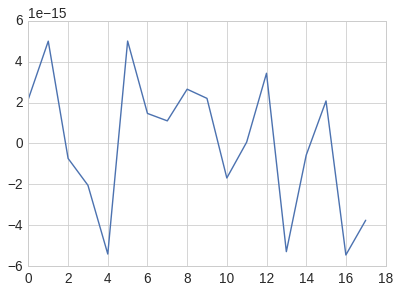

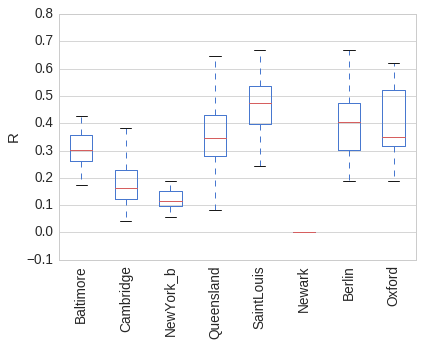

In [371]:
plt.plot(np.hstack(res_sites[6]))

print 'mean',np.hstack(res_sites[1:]).mean()
print 'std',np.hstack(res_sites[1:]).std()
fig=plt.figure()
ax = plt.gca()
labels_ = ['Baltimore','Cambridge','NewYork_b','Queensland','SaintLouis','Newark','Berlin','Oxford']
plt.boxplot(res_sites[1:],labels=labels_)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylabel('R')


ax.xaxis.grid(False)


In [15]:
reload(vis)
dd = []
for i in range(len(all_matrix)):
    if i==0:
        dd = all_matrix[i][:,np.newaxis]
    else:
        dd = np.hstack((dd,all_matrix[i][:,np.newaxis]))
    
dd = ts.vec2mat(dd.sum(axis=1))

fig = plt.figure(figsize=(4, 4),dpi=150)
sns.set_context('paper',font_scale=1.7)
vis.mat(hc.ordermat(dd,ind_sub),[0,4],True,False)
ax = plt.gca()
ax.grid(False)

show_cluster(ind_sub)

cmap = plt.cm.jet
ax_bar = fig.add_axes([0.085, 0.16, 0.03, 0.71])
ax_bar_top = fig.add_axes([0.124,0.877 , 0.71,0.03])
#bounds = np.linspace(0, 100, 7)
bounds=[0]
for i in range(7,0,-1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
cmm = mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing=bounds ,orientation='vertical')
#ax_bar.get_yaxis().set_ticks([])
#ax_bar.grid(False)
ax_bar.set_ylabel('Regions')
ax_bar.yaxis.tick_left()
ax_bar.yaxis.set_label_position('left')

cmap = plt.cm.jet_r
bounds=[0]
for i in range(1,8,1):
        bounds.append(bounds[-1] + np.sum(ind_sub==i))

norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
mpl.colorbar.ColorbarBase(ax_bar_top, cmap=cmap, norm=norm, spacing=bounds ,orientation='horizontal')
#ax_bar_top.get_xaxis().set_ticks([])
#ax_bar_top.grid(False)
ax_bar_top.set_xlabel('Regions')
ax_bar_top.xaxis.tick_top()
ax_bar_top.xaxis.set_label_position('top')
ll = ax_bar_top.get_xticklabels()
for label in ll:
    label.set_rotation(90)

plt.savefig(main_path + 'figures/matrix_signif_conn_multisite.png')

NameError: name 'all_matrix' is not defined

0.384117647059 0.57403175587
0.425 0.603634823382
0.525833333333 0.664077785772
0.55875 0.631702807893
0.670714285714 0.703663518266
0.385555555556 0.550971084361
0.31625 0.508660925863
[[  1.00000000e+00   6.70302770e-02   3.69209881e-13   1.61214528e-16
    1.39122345e-33   9.50279879e-01   2.89770858e-03]
 [  6.70302770e-02   1.00000000e+00   5.20664260e-06   1.44940312e-08
    2.17535650e-21   1.19564151e-01   1.49629922e-05]
 [  3.69209881e-13   5.20664260e-06   1.00000000e+00   1.13929249e-01
    4.80145159e-10   9.82490754e-10   3.92491394e-20]
 [  1.61214528e-16   1.44940312e-08   1.13929249e-01   1.00000000e+00
    5.39067725e-06   1.22156046e-12   1.59961175e-23]
 [  1.39122345e-33   2.17535650e-21   4.80145159e-10   5.39067725e-06
    1.00000000e+00   9.97488065e-27   1.66637635e-40]
 [  9.50279879e-01   1.19564151e-01   9.82490754e-10   1.22156046e-12
    9.97488065e-27   1.00000000e+00   7.11566912e-03]
 [  2.89770858e-03   1.49629922e-05   3.92491394e-20   1.59961175e-23


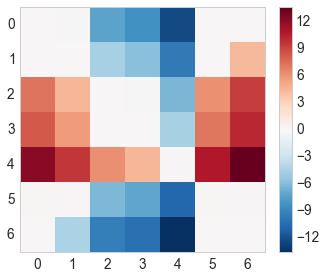

In [58]:
for i in range(1,8): print dd[ind_sub==i,:].mean(),dd[ind_sub==i,:].std()

comp_matrix = np.zeros((7,7))
pval_matrix = np.zeros((7,7))
for i in range(1,8):
    for j in range(1,8):
        ttest,pval= scipy.stats.ttest_ind(dd[ind_sub==i,:].flatten().T,dd[ind_sub==j,:].flatten().T,equal_var=False)
        #if rejected==True:
        comp_matrix[i-1,j-1] = ttest
        pval_matrix[i-1,j-1] = pval
        #    print i,j, ttest,pval


rejected , pvaluecorrected = smm.multipletests(pval_matrix.flatten(), alpha=0.05, method='fdr_bh')[:2]
rejected = np.reshape(rejected,(7,7))
print pval_matrix
print rejected,pvaluecorrected
vis.mat(comp_matrix*(pval_matrix<(0.05/49)))
plt.grid(False)

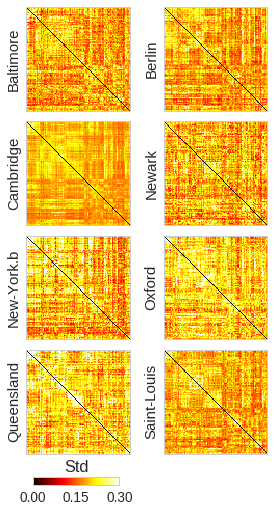

In [65]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)
dist_std = []
def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(4, 8),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites)/2,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.01, hspace=0.1, left=0.05, right=1)
    for sidx in range(0,4):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(2*sidx,2*sidx+2):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            dist_std.append(ts.mat2vec(site_std_tmp))
            # include the last std at the end of the 
            
            ax2 = plt.subplot(grid2[0])
            vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            ax2.get_yaxis().set_visible(True)
            ax2.get_yaxis().set_ticks([])
            plt.ylabel(site_names[site_diff_idx])

            col_idx = 1

    
    from sklearn import linear_model
    

    
    
    # include the color bars 1
    lim = lim_std
    cmap = vis.get_cmap(site_std, lim)
    ax_bar = fig.add_axes([0.13, 0.07, 0.30, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Std')
    
    

    
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/connectome_std_multisite2.pdf')
    plt.savefig(main_path + 'figures/connectome_std_multisite2.png')
                

gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



(28,)


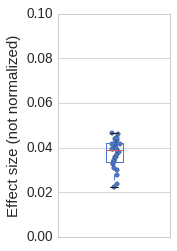

In [512]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)
dist_std = []
def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(7, 40),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites),1, wspace=0.0, hspace=0.5)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.01, hspace=0.1, left=0.05, right=1)
    data_ = []
    for sidx in range(0,8):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        site_mean_ref, site_std_ref = get_stats(list_conn_sites[sidx])
        site_std_ref = ts.mat2vec(site_std_ref)
        col_idx = 0
        data_tmp = []
        names_=[]
        for ii in range(len(list_conn_sites)):
            
            if ii != sidx:
                #print sidx, ii
                
                site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[ii])
                site_std_tmp = ts.mat2vec(site_std_tmp)
                std_diff = np.abs(site_std_ref - site_std_tmp)
                #print std_diff.min(),std_diff.max()
                #dist_std.append(std_diff)
                # include the last std at the end of the 

                data_tmp.append(np.mean(std_diff))
                #vis.mat(hc.ordermat(std_diff,order),lim_std,False,False)
                #plt.boxplot(ts.mat2vec(std_diff))
                #ax2.get_yaxis().set_visible(True)
                #ax2.get_yaxis().set_ticks([])
                #plt.ylabel(site_names[ii])
                
                #if col_idx == 0: 
                    #plt.title(site_names[sidx])


    #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[0,sidx], wspace=0.05)
        data_.extend(data_tmp)
    plt.figure(figsize=(2,4),dpi=150)   
    #ax2 = plt.subplot(grid1[sidx])    
    data_ = np.unique(np.array(data_))
    print data_.shape
    plt.scatter(1+np.random.randn(len(data_))/50.,data_)
    plt.boxplot(data_)
    plt.xlim([0.5,1.5])
    plt.ylim([0.,0.1])
    ax =plt.gca()
    ax.get_xaxis().set_visible(False)
    plt.ylabel('Effect size (not normalized)')
    
    

gen_fig(list_conn_sites)



(28,) 0.117031689214 0.227948647592 0.188503593882


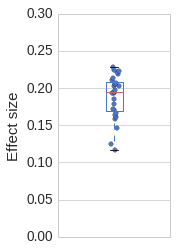

In [514]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)
dist_std = []
def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(7, 40),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(len(list_conn_sites),1, wspace=0.0, hspace=0.5)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.01, hspace=0.1, left=0.05, right=1)
    data_ = []
    for sidx in range(0,8):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        site_mean_ref, site_std_ref = get_stats(list_conn_sites[sidx])
        site_std_ref = ts.mat2vec(site_std_ref)
        col_idx = 0
        data_tmp = []
        names_=[]
        for ii in range(len(list_conn_sites)):
            
            if ii != sidx:
                #print sidx, ii
                
                site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[ii])
                site_std_tmp = ts.mat2vec(site_std_tmp)
                std_diff = np.abs(site_std_ref - site_std_tmp)/((site_std_ref + site_std_tmp)/2)
                #print std_diff.min(),std_diff.max()
                #dist_std.append(std_diff)
                # include the last std at the end of the 

                data_tmp.append(np.mean(std_diff))
                #vis.mat(hc.ordermat(std_diff,order),lim_std,False,False)
                #plt.boxplot(ts.mat2vec(std_diff))
                #ax2.get_yaxis().set_visible(True)
                #ax2.get_yaxis().set_ticks([])
                #plt.ylabel(site_names[ii])
                
                #if col_idx == 0: 
                    #plt.title(site_names[sidx])


    #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[0,sidx], wspace=0.05)
        data_.extend(data_tmp)
    plt.figure(figsize=(2,4),dpi=150)   
    #ax2 = plt.subplot(grid1[sidx])    
    data_ = np.unique(np.array(data_))
    print data_.shape,data_.min(),data_.max(),data_.mean()
    plt.scatter(1+np.random.randn(len(data_))/50.,data_)
    plt.boxplot(data_)
    plt.xlim([0.5,1.5])
    plt.ylim([0.,0.3])
    ax =plt.gca()
    ax.get_xaxis().set_visible(False)
    plt.ylabel('Effect size')
    
    

gen_fig(list_conn_sites)



In [475]:
np.random.randn(10)

array([ 1.206372  , -0.23885881, -0.80649246, -0.86510505,  0.13729561,
        0.42023142, -0.16415921,  0.52234015,  0.44167103,  0.76755883])

(0, 0.4)

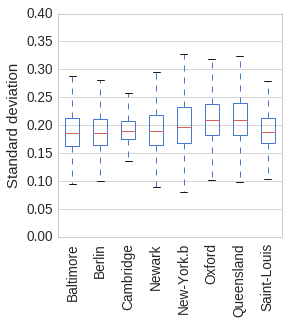

In [66]:
site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
ii=0
fig,ax = plt.subplots(figsize=(4, 4))

plt.boxplot(dist_std,labels=site_names,notch=0)
ax.xaxis.grid(False)
ax.set_ylabel('Standard deviation')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90)
plt.ylim(0,0.4)

## Matrix brain

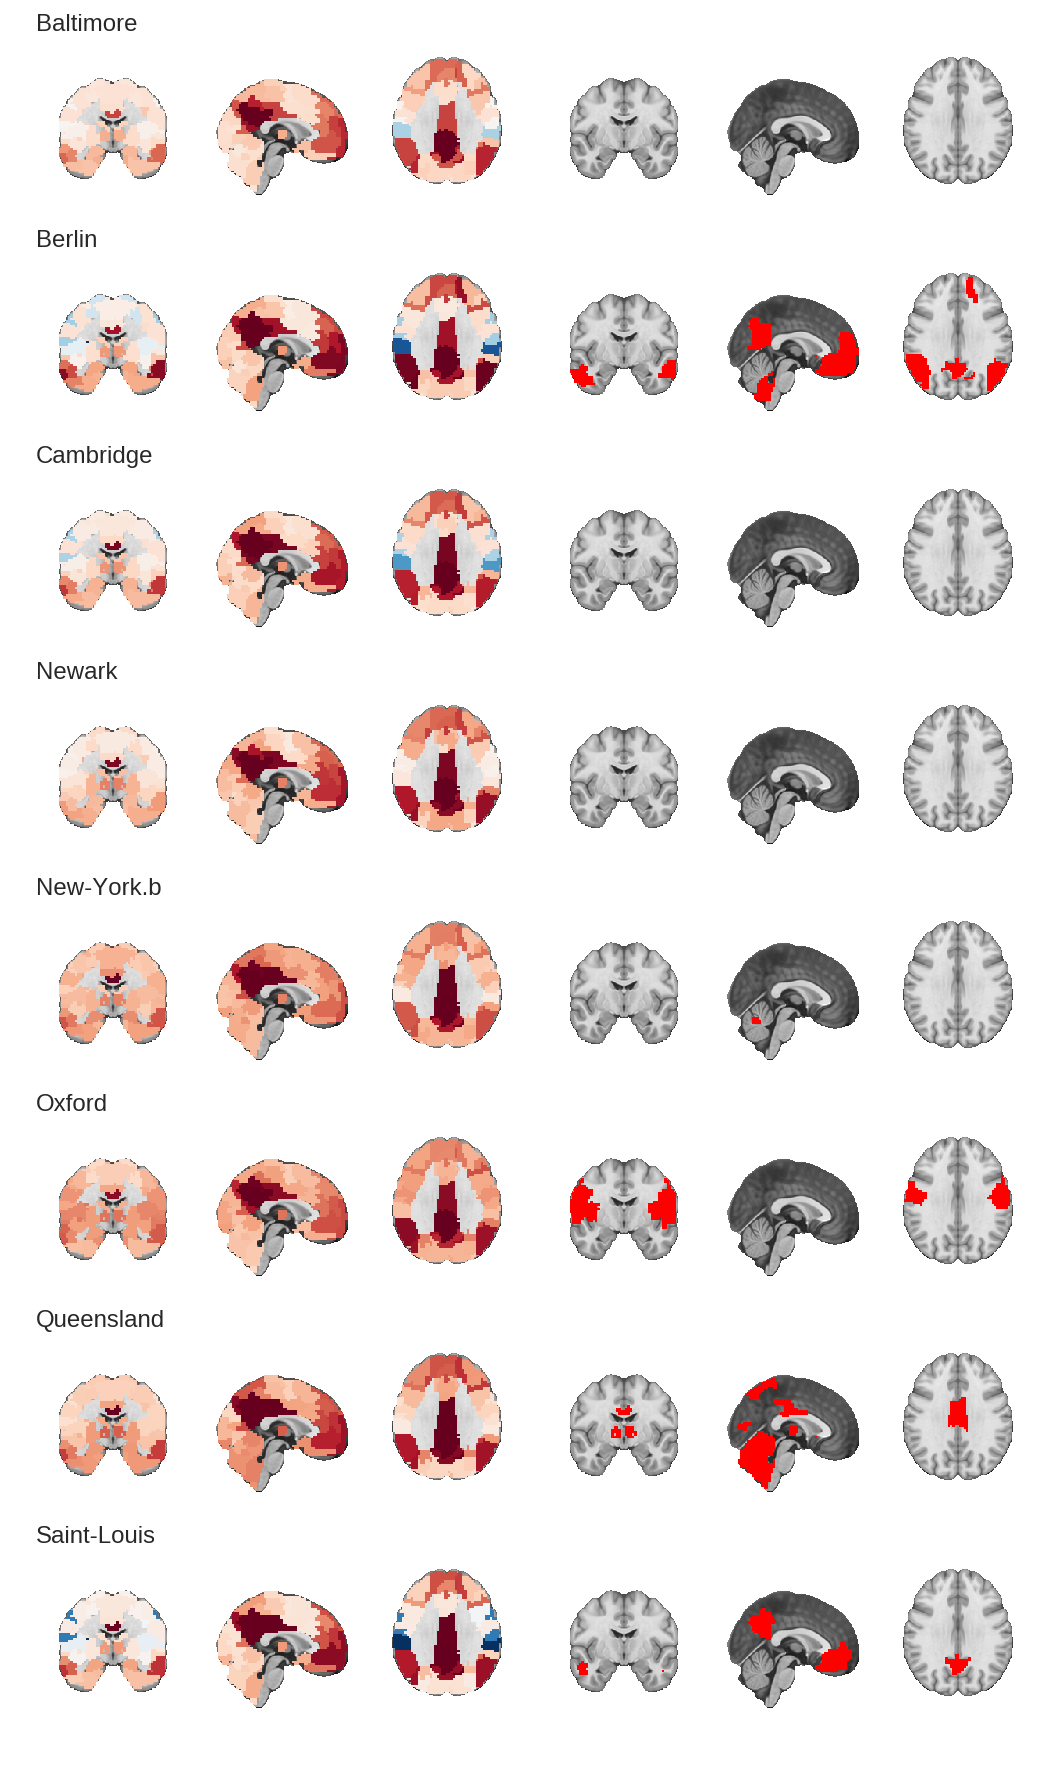

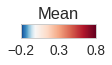

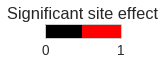

In [93]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

import copy
import nilearn
from nilearn import plotting
import nibabel as nib

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    anat_template = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, -7,30)
    
    all_dmn=[]
    
    im_ref = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(14, 24),dpi=300)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(8,1, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.001, left=0.01, right=1., bottom=0.0,top=1.)
    for sidx in range(0,8):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(1):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.001)

            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[sidx])
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            nn_map = mapvec(site_mean_tmp[selected_network_idx,:],im_ref)
            ax1 = plt.subplot(grid2[:,shift_col])
            
            display = plotting.plot_anat(anat_img=anat_template,
                                         display_mode='ortho',
                                         cut_coords=cutcoor,
                                         annotate=False,
                                         draw_cross=False,
                                         axes=ax1)

            display.add_overlay(nn_map,
                                cmap=vis.get_cmap(nn_map.get_data()),
                                vmin=lim_mean[0],
                                vmax=lim_mean[1])
            
            
            #ax1.get_yaxis().set_visible(True)
            #ax1.get_yaxis().set_ticks([])
            #plt.ylabel(site_names[site_diff_idx])
            #ax1.text(-0.1,0.6,site_names[site_diff_idx],verticalalignment='center',rotation='vertical',size=16)
            ax1.text(0,1.,site_names[sidx],horizontalalignment='left',verticalalignment='top',size=24)
            
            
            conn_vec_tmp = []
            
            for k in range(len(list_conn_sites)):
                if k==0:
                    conn_vec_tmp = list_conn_sites[k]
                else:
                    conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

            x_=[]
            contrast=[]
            for k in range(0,len(demog_data)):
                #tmp_x = sm.tools.add_constant(demog_data[k])
                tmp_x = demog_data[k]
                if len(x_)==0:
                    contrast = np.zeros((tmp_x.shape[0],8))
                    contrast[:,k] = 1
                    x_ = np.hstack((tmp_x,contrast))
                else:
                    contrast_tmp = np.zeros((tmp_x.shape[0],8))
                    contrast_tmp[:,k] = 1
                    contrast = np.vstack((contrast,contrast_tmp))
                    tmp_x = np.hstack((tmp_x,contrast_tmp))
                    x_ = np.vstack((x_,tmp_x))
                    
                    
            contrast=[0,0,0]
            for k in range(0,len(demog_data)):
                
                if k==sidx:
                    contrast.append(1)
                else:
                    num = demog_data[k].shape[0]
                    denom = x_.shape[0] - demog_data[sidx].shape[0]
                    contrast.append(-(num/float(denom)))
            contrast = np.array(contrast)          
            
            pval = []
            #print conn_vec_tmp.shape
            labels, regression_result  = nsglm.session_glm(conn_vec_tmp.T,x_)
            cont_results = nsglm.compute_contrast(labels,regression_result, contrast,contrast_type='t')
            pval = cont_results.p_value()
            rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
            rejected = ts.vec2mat(rejected,0)
            #print conn_vec_tmp.shape
            site_mean_tmp, site_std_tmp = get_stats(conn_vec_tmp)
            ax3 = plt.subplot(grid2[:,shift_col+1])
            #vis.mat(hc.ordermat(rejected ,order),lim_mean_diff,False,False)
            
            all_dmn.append(rejected[selected_network_idx,:])
            nn_map = mapvec(rejected[selected_network_idx,:],im_ref)
            display = plotting.plot_anat(anat_img=anat_template,
                                         display_mode='ortho',
                                         cut_coords=cutcoor,
                                         annotate=False,
                                         draw_cross=False,
                                         axes=ax3)

            display.add_overlay(nn_map,
                                cmap=plotting.cm.bwr,
                                vmin=lim_std[0],
                                vmax=lim_std[1])
                                
                                
            col_idx = 1
            
            

    
    from sklearn import linear_model
    

    fig = plt.figure(figsize=(7,7),dpi=300)
    # include the color bars 2
    lim = lim_mean
    cmap = vis.get_cmap(site_mean, lim)
    ax_bar = fig.add_axes([0.0, 0.0, 0.15, 0.028])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Mean')
    
    

    # include the color bars 3
    '''
    lim = lim_mean_diff
    cmap = plotting.cm.bwr
    ax_bar = fig.add_axes([0.34, 0.0, 0.10, 0.015])
    bounds = np.linspace(lim[0], lim[1], 3)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N)
    mpl.colorbar.ColorbarBase(ax_bar, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds ,boundaries=bounds,orientation='horizontal')
    '''
    import matplotlib.patches as mpatches
    fig = plt.figure(figsize=(7,7),dpi=300)
    ax_bar = fig.add_axes([0.75, 0.0, 0.15, 0.028])
    vis.color_bar_horizontal(ax_bar, cmap_br, [0,1],2)
    #ax_bar.locator_params(tight=True,nbins=4)
    #plt.locator_params(tight=True,nbins=4)
    plt.title('Significant site effect')
    
    plt.savefig(main_path + 'figures/dmn_multisite2.pdf')
    plt.savefig(main_path + 'figures/dmn_multisite2.png')
    return all_dmn
                

all_dmn=gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



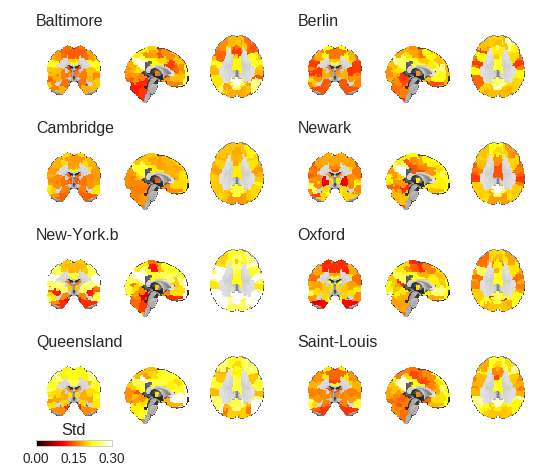

In [70]:
from proteus.predic import clustering as hc
from proteus.matrix import tseries as ts
from proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

import copy
import nilearn
from nilearn import plotting
import nibabel as nib

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    anat_template = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, -7,30)
    
    all_dmn=[]
    
    im_ref = nib.load('/home/cdansereau/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.2,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(7, 6),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(4,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.001, left=0.01, right=1., bottom=0.01,top=1.)
    for sidx in range(0,4):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        col_idx = 0
        for site_diff_idx in range(2*sidx,2*sidx+2):
            grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.001)

            #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
            #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
            site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[site_diff_idx])
            
            
            if col_idx==1:
                shift_col = 3
            else:
                shift_col = 0
            shift_col = 0
            
            
            # include the last std at the end of the 
            all_dmn.append(site_std_tmp[selected_network_idx,:])
            nn_map = mapvec(site_std_tmp[selected_network_idx,:],im_ref)
            ax2 = plt.subplot(grid2[0])
            ax2.text(0,1.,site_names[site_diff_idx],horizontalalignment='left',verticalalignment='top',size=16)
            display = plotting.plot_anat(anat_img=anat_template,
                                         display_mode='ortho',
                                         cut_coords=cutcoor,
                                         annotate=False,
                                         draw_cross=False,
                                         axes=ax2)

            display.add_overlay(nn_map,
                                cmap=plotting.cm.black_red,
                                vmin=lim_std[0],
                                vmax=lim_std[1])
            
            #vis.mat(hc.ordermat(site_std_tmp,order),lim_std,False,False)
            #plt.ylabel('std')
            #if sidx == 0:
            #    plt.title('Std')
           
            
            col_idx = 1
            
            

    
    
    
    
    # include the color bars 1
    lim = lim_std
    cmap = vis.get_cmap(site_std, lim)
    ax_bar = fig.add_axes([0.01, 0.0, 0.15, 0.015])
    vis.color_bar_horizontal(ax_bar, cmap, lim,3)
    plt.title('Std')

    
    #fig.tight_layout()
    plt.savefig(main_path + 'figures/dmn_stdmultisite.pdf')
    plt.savefig(main_path + 'figures/dmn_stdmultisite.png')
    return all_dmn
                

all_std_dmn=gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



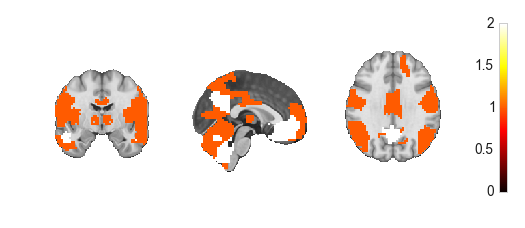

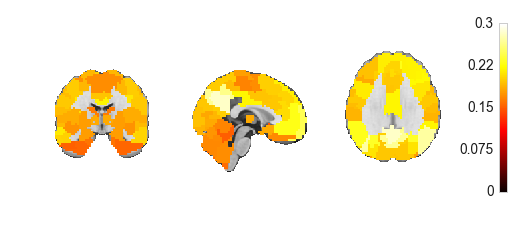

In [62]:
im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')

cutcoor=(0,-7,30)
plt.figure()
for i in range(8):
    if i==0:
        dd = all_dmn[i][:,np.newaxis]
    else:
        dd = np.hstack((dd,all_dmn[i][:,np.newaxis]))

nn_map = ts.vec2map(dd.sum(axis=1),im_ref)
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='ortho',
                             cut_coords=cutcoor,
                             annotate=False,
                             draw_cross=False)

display.add_overlay(nn_map,
                    colorbar=True,
                    vmin=0,
                    cmap=plotting.cm.black_red)

plt.savefig(main_path + 'figures/dmn_signif_conn_multisite.png')

plt.figure()

for i in range(8):
    if i==0:
        dd = all_std_dmn[i][:,np.newaxis]
    else:
        dd = np.hstack((dd,all_std_dmn[i][:,np.newaxis]))

nn_map = ts.vec2map(dd.mean(axis=1),im_ref)
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='ortho',
                             cut_coords=cutcoor,
                             annotate=False,
                             draw_cross=False)

display.add_overlay(nn_map,
                    colorbar=True,
                    cmap=plotting.cm.black_red,
                    vmin=0.,
                    vmax=.3)

plt.savefig(main_path + 'figures/dmn_meanstd_conn_multisite.png')

In [245]:
np.min(dd.mean(axis=1))

0.0

In [158]:
for i in range(8):
    if i==0:
        dd = all_dmn[i][:,np.newaxis]
    else:
        dd = np.hstack((dd,all_dmn[i][:,np.newaxis]))
dd.mean(axis=1).shape

(100,)

## make box plot of the variance

In [5]:
from Proteus.proteus.predic import clustering as hc
from Proteus.proteus.matrix import tseries as ts
from Proteus.proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

import copy
import nilearn
from nilearn import plotting
import nibabel as nib

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, 0,30)
    
    im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(16, 16),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(4,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.01, left=0.01, right=0.48, bottom=0.7,top=1.)
    
    all_rejected = np.array([])
    all_avg = np.array([])
    
    for sidx in range(0,len(list_conn_sites)):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.01)

        #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
        #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
        site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[sidx])


        ## difference computation
        
        conn_vec_tmp = []

        for k in range(len(list_conn_sites)):
            if k==0:
                conn_vec_tmp = list_conn_sites[k]
            else:
                conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

        x_=[]
        contrast=[]
        for k in range(0,len(demog_data)):
            tmp_x = sm.tools.add_constant(demog_data[k])
            if k==sidx:
                if len(x_)==0:
                    contrast = np.ones(tmp_x.shape[0])
                    x_ = tmp_x
                else:
                    contrast = np.hstack((contrast,np.ones(tmp_x.shape[0])))
                    x_ = np.vstack((x_,tmp_x))
            else:
                if len(x_)==0:
                    contrast = np.zeros(tmp_x.shape[0])
                    x_ = tmp_x
                else:
                    contrast = np.hstack((contrast,np.zeros(tmp_x.shape[0])))
                    x_ = np.vstack((x_,tmp_x))

        x_ = np.hstack((contrast[:,np.newaxis],x_))
        pval = []
        #print conn_vec_tmp.shape
        for nn in range(conn_vec_tmp.shape[0]):
            y_ = conn_vec_tmp[nn,:]
            glm_ = sm.GLM(y_, x_)
            res = glm_.fit()
            #print(res.summary())
            pval.append(res.pvalues[0])
        pval = np.array(pval)
        rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
        if len(all_rejected)==0:
            all_rejected = rejected
        else:
            all_rejected = np.vstack((all_rejected,rejected))
        
                    
    return all_rejected 
    
    
                

all_rejected = gen_fig(list_conn_sites)

site_mean, site_std = get_stats(conns_stack)
#vis.matrix.mat(site_mean,[-1,1.3])
#vis.matrix.mat(site_mean)



KeyboardInterrupt: 

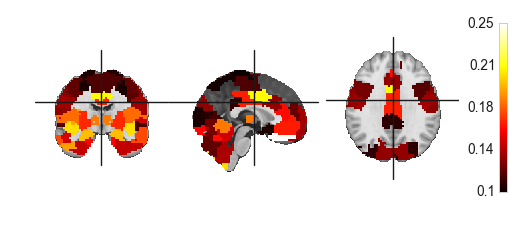

In [78]:
anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')
im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
var_sources = ts.vec2mat(all_rejected.mean(axis=0),0).mean(axis=0)

nn_map = mapvec(var_sources,im_ref)
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='ortho',
                             cut_coords=(0,-7,30),
                             annotate=False,
                             draw_cross=True)

display.add_overlay(nn_map,
                    colorbar=True,
                    threshold=0.1,
                    cmap=cm.hot)


plt.savefig(main_path + 'figures/alldiff_multisite.png')

## 7 networks variance areas

(100, 100)


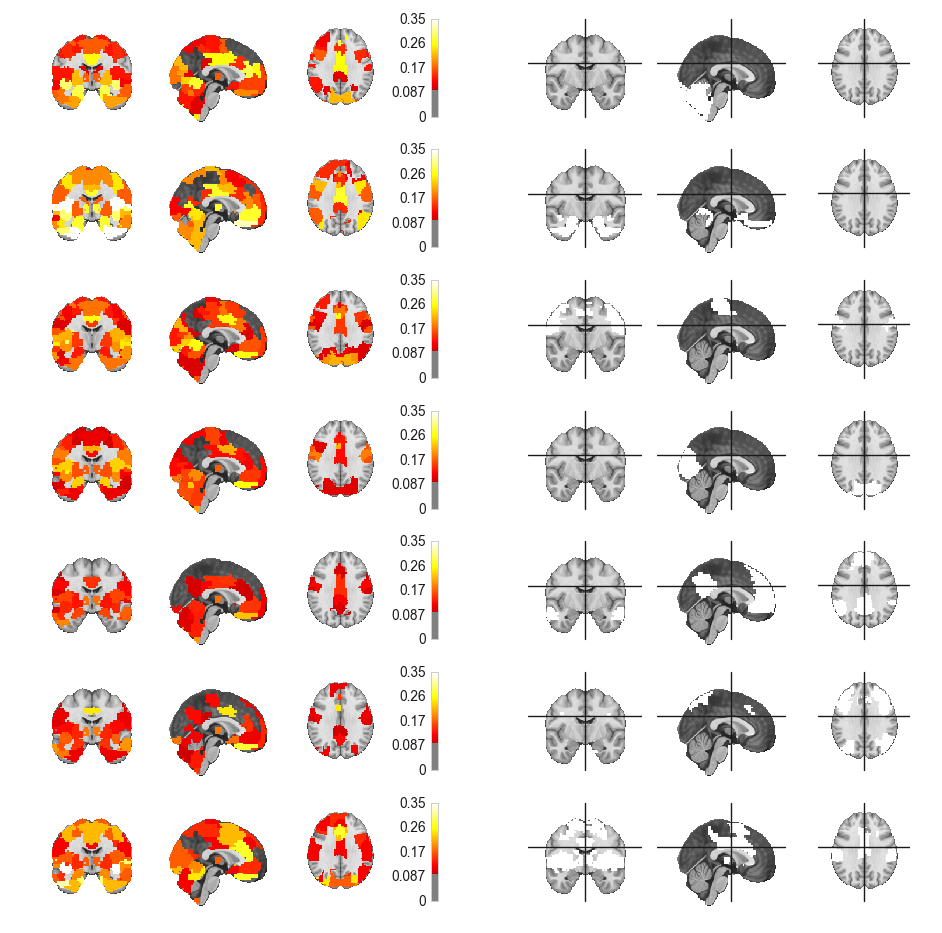

In [77]:
reload(ts)

fig=plt.figure()
im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())

im_net7 = nib.load('/Users/christian/data/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')
#im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())

var_sources = ts.vec2mat(all_rejected.mean(axis=0),0)
print var_sources.shape

#tmp_img = ts.vec2map(var_sources,im_ref)

#tmp_img = np.swapaxes(np.array(tmp_img.get_data()),0,2)

tmp_ref = np.swapaxes(np.array(im_ref.get_data()),0,2)

d = np.floor(ts.get_ts(im_net7.get_data(),tmp_ref)[:,0])



#nn_map = ts.vec2map(d,im_net7)


#vis.mat(hc.projectmat(var_sources,d))
k=0
plt.figure(figsize=(16, 16))
for i in range(1,14,2):
    
    ax = plt.subplot(7,2,i)
    nn_map = mapvec(var_sources[d==k+1,:].mean(axis=0),im_ref)
    display = plotting.plot_anat(anat_img=anat_template,
                                 display_mode='ortho',
                                 cut_coords=(0,-7,30),
                                 annotate=False,
                                 axes=ax,
                                 draw_cross=False)

    display.add_overlay(nn_map,
                        colorbar=True,
                        threshold=0.1,
                        vmin=0,
                        vmax=0.35,
                        cmap=cm.hot)
    
    ax = plt.subplot(7,2,i+1)
    dd = np.zeros(7)
    dd[k] = 1
    nn_map = mapvec(dd,im_net7)
    display = plotting.plot_anat(anat_img=anat_template,
                                 display_mode='ortho',
                                 cut_coords=(0,-7,30),
                                 annotate=False,
                                 axes=ax,
                                 draw_cross=True)

    display.add_overlay(nn_map,
                        colorbar=False)
    
    k+=1
#fig.tight_layout()
plt.savefig(main_path + 'figures/variance_location_7net.png')

## Plot the average default mode network

(4950,)


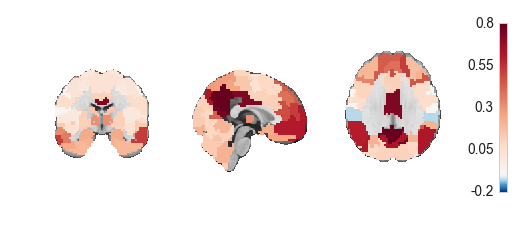

In [63]:
conn_vec_tmp = []



for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k]
    else:
        conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

print conn_vec_tmp.mean(axis=1).shape
im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
var_sources = ts.vec2mat(conn_vec_tmp.mean(axis=1),0)[0,:]

nn_map = ts.vec2map(var_sources,im_ref)
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='ortho',
                             cut_coords=(0,-7,30),
                             annotate=False,
                             draw_cross=False)

display.add_overlay(nn_map,
                    colorbar=True,
                    cmap=vis.get_cmap(var_sources),#cm.RdBu_r,
                    vmin=-0.2,
                    vmax=0.8)




(4950,)


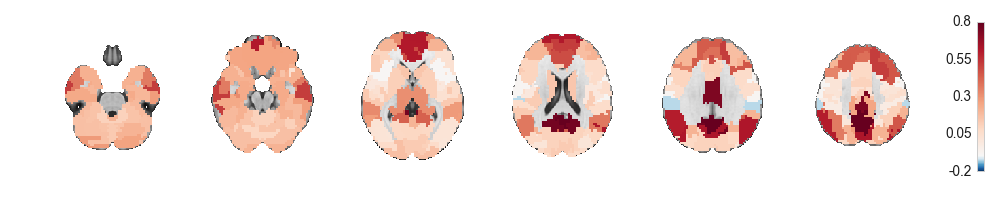

In [961]:
conn_vec_tmp = []



for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k]
    else:
        conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

print conn_vec_tmp.mean(axis=1).shape
im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
var_sources = ts.vec2mat(conn_vec_tmp.mean(axis=1),0)[0,:]

nn_map = ts.vec2map(var_sources,im_ref)
display = plotting.plot_anat(anat_img=anat_template,
                             display_mode='z',
                             cut_coords=[-30,-20,0,20,30,45],
                             annotate=False,
                             draw_cross=False)

display.add_overlay(nn_map,
                    colorbar=True,
                    cmap=vis.get_cmap(var_sources),#cm.RdBu_r,
                    vmin=-0.2,
                    vmax=0.8)




In [ ]:
## plot intra site STD

##Intersite variance (plot the beta values)

In [16]:
from Proteus.proteus.predic import clustering as hc
from Proteus.proteus.matrix import tseries as ts
from Proteus.proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from scipy import stats
import statsmodels.stats.multitest as smm
from matplotlib.pylab import *

import copy
import nilearn
from nilearn import plotting
import nibabel as nib

reload(vis)
#reload(vis.matrix)
reload(ts)
reload(hc)

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

def get_stats(conns):
    # compute the mean, std, ...   
    return ts.vec2mat(conns.mean(axis=1)), ts.vec2mat(conns.std(axis=1),val_diag=0)

def gen_fig(list_conn_sites):
    anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, 0,30)
    
    im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Berlin','Cambridge','Newark','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(16, 16),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(4,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.01, left=0.01, right=0.48, bottom=0.7,top=1.)
    
    all_rejected = np.array([])
    all_avg = np.array([])
    
    for sidx in range(0,len(list_conn_sites)):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.01)

        #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
        #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
        site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[sidx])


        ## difference computation
        
        conn_vec_tmp = []

        for k in range(len(list_conn_sites)):
            if k==0:
                conn_vec_tmp = list_conn_sites[k]
            else:
                conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

        x_=[]
        contrast=[]
        for k in range(0,len(demog_data)):
            #tmp_x = sm.tools.add_constant(demog_data[k])
            tmp_x = demog_data[k]
            if len(x_)==0:
                contrast = np.zeros((tmp_x.shape[0],8))
                contrast[:,k] = 1
                x_ = np.hstack((tmp_x,contrast))
            else:
                contrast_tmp = np.zeros((tmp_x.shape[0],8))
                contrast_tmp[:,k] = 1
                contrast = np.vstack((contrast,contrast_tmp))
                tmp_x = np.hstack((tmp_x,contrast_tmp))
                x_ = np.vstack((x_,tmp_x))


        contrast=[0.,0,0]
        for k in range(0,len(demog_data)):

            if k==sidx:
                contrast.append(1)
            else:
                num = demog_data[k].shape[0]
                denom = x_.shape[0] - demog_data[sidx].shape[0]
                contrast.append(0)
        contrast = np.array(contrast) 
        
        print conn_vec_tmp.T.shape, x_.shape
        model = {'y': conn_vec_tmp.T,'x': x_*1.,'c':contrast};
        print contrast
        res = niakglm(model)
        std_eff = res['cohens_d']

        #plt.figure()
        #plt.plot(x_[:,0])
        
        if len(all_rejected)==0:
            all_rejected = std_eff
        else:
            all_rejected = np.vstack((all_rejected,std_eff))
        
                    
    return all_rejected,model,res
    
    

    # include the color bars 2
    #plt.savefig(main_path + 'figures/alldiff_multisite.pdf')
    #plt.savefig(main_path + 'figures/alldiff_multisite.png')
    
                

all_beta_intra,model,res = gen_fig(list_conn_sites)
scipy.io.savemat('/Users/christian/Dropbox/model_test_glmpy.mat',model)
conn_vec_tmp = []
site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']
for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k].std(axis=1)
    else:
        conn_vec_tmp = np.vstack((conn_vec_tmp,list_conn_sites[k].std(axis=1)))

n, p = 40, 8
print np.abs(all_beta_intra.T)
print all_beta_intra.T

# Use cubehelix to get a custom sequential palette
#pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
plt.figure()
conn_vec_tmp = pd.DataFrame(np.abs(all_beta_intra.T),columns=site_names)
# Show each distribution with both violins and points

ax = sns.violinplot(data=conn_vec_tmp)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set_ylim(-0.2,0.2)




ImportError: No module named Proteus.proteus.predic

In [136]:
res['ttest'][0:10]

array([ -0.70651123,   4.73825025,  10.44053204,   3.1466281 ,
         4.45045824,   4.15841268,   4.44488896,   0.74720609,
        -1.95075689,   5.96995781])

(343, 4950) (343, 11)
[ 0.          0.          0.          1.         -0.08074534 -0.60559006
 -0.04968944 -0.05590062 -0.05900621 -0.05279503 -0.09627329]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06624606  1.         -0.61514196
 -0.05047319 -0.05678233 -0.05993691 -0.05362776 -0.0977918 ]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.14189189 -0.17567568  1.
 -0.10810811 -0.12162162 -0.12837838 -0.11486486 -0.20945946]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06422018 -0.0795107  -0.59633028
  1.         -0.05504587 -0.05810398 -0.05198777 -0.09480122]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06461538 -0.08       -0.6
 -0.04923077  1.         -0.05846154 -0.05230769 -0.09538462]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06481481 -0.08024691 -0.60185185
 -0.04938272 -0.05555556  1.         -0.05246914 -0.09567901]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06441718 -0

(-0.2, 0.2)

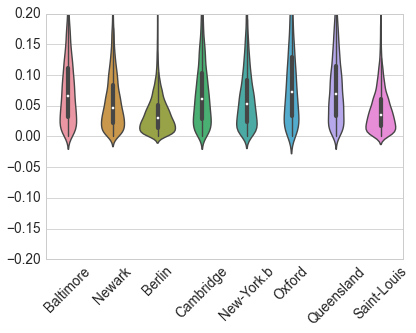

In [16]:

def gen_fig(list_conn_sites):
    anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, 0,30)
    
    im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(16, 16),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(4,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.01, left=0.01, right=0.48, bottom=0.7,top=1.)
    
    all_rejected = np.array([])
    all_avg = np.array([])
    
    for sidx in range(0,len(list_conn_sites)):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.01)

        #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
        #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
        site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[sidx])


        ## difference computation
        
        conn_vec_tmp = []

        for k in range(len(list_conn_sites)):
            if k==0:
                conn_vec_tmp = list_conn_sites[k]
            else:
                conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

        x_=[]
        contrast=[]
        for k in range(0,len(demog_data)):
            #tmp_x = sm.tools.add_constant(demog_data[k])
            tmp_x = demog_data[k]
            if len(x_)==0:
                contrast = np.zeros((tmp_x.shape[0],8))
                contrast[:,k] = 1
                x_ = np.hstack((tmp_x,contrast))
            else:
                contrast_tmp = np.zeros((tmp_x.shape[0],8))
                contrast_tmp[:,k] = 1
                contrast = np.vstack((contrast,contrast_tmp))
                tmp_x = np.hstack((tmp_x,contrast_tmp))
                x_ = np.vstack((x_,tmp_x))


        contrast=[0.,0,0]
        for k in range(0,len(demog_data)):

            if k==sidx:
                contrast.append(1)
            else:
                num = demog_data[k].shape[0]
                denom = x_.shape[0] - demog_data[sidx].shape[0]
                contrast.append(-(num/float(denom)))
        contrast = np.array(contrast) 
        
        print conn_vec_tmp.T.shape, x_.shape
        model = {'y': conn_vec_tmp.T,'x': x_*1.,'c':contrast};
        print contrast
        res = niakglm(model)
        std_eff = res['eff']

        #plt.figure()
        #plt.plot(x_[:,0])
        #x_ = np.hstack((contrast[:,np.newaxis],x_))
        #beta = []
        #print conn_vec_tmp.shape
        #for nn in range(conn_vec_tmp.shape[0]):
        #for nn in range(2):
        #    y_ = conn_vec_tmp[nn,:]
        #   glm_ = sm.GLM(y_, x_)
        #    res = glm_.fit()
        #    beta.append(res.params[0])
        #beta = np.array(beta)
        #rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
        if len(all_rejected)==0:
            all_rejected = std_eff
        else:
            all_rejected = np.vstack((all_rejected,std_eff))
        
                    
    return all_rejected
    
    

    # include the color bars 2
    #plt.savefig(main_path + 'figures/alldiff_multisite.pdf')
    #plt.savefig(main_path + 'figures/alldiff_multisite.png')
    
                

all_beta_inter = gen_fig(list_conn_sites)


conn_vec_tmp = []
site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']
for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k].std(axis=1)
    else:
        conn_vec_tmp = np.vstack((conn_vec_tmp,list_conn_sites[k].std(axis=1)))

n, p = 40, 8
print np.abs(all_beta_inter.T)
print all_beta_inter.T

# Use cubehelix to get a custom sequential palette
#pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
plt.figure()
conn_vec_tmp = pd.DataFrame(np.abs(all_beta_inter.T),columns=site_names)
# Show each distribution with both violins and points

ax = sns.violinplot(data=conn_vec_tmp)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set_ylim(-0.2,0.2)




(343, 4950) (343, 11)
[ 0.          0.          0.          1.         -0.08074534 -0.60559006
 -0.04968944 -0.05590062 -0.05900621 -0.05279503 -0.09627329]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06624606  1.         -0.61514196
 -0.05047319 -0.05678233 -0.05993691 -0.05362776 -0.0977918 ]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.14189189 -0.17567568  1.
 -0.10810811 -0.12162162 -0.12837838 -0.11486486 -0.20945946]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06422018 -0.0795107  -0.59633028
  1.         -0.05504587 -0.05810398 -0.05198777 -0.09480122]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06461538 -0.08       -0.6
 -0.04923077  1.         -0.05846154 -0.05230769 -0.09538462]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06481481 -0.08024691 -0.60185185
 -0.04938272 -0.05555556  1.         -0.05246914 -0.09567901]
(343, 4950) (343, 11)
[ 0.          0.          0.         -0.06441718 -0

(-0.2, 0.2)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


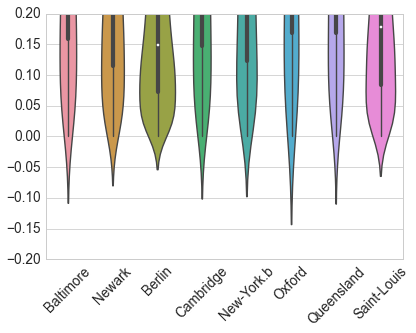

In [15]:

def gen_fig(list_conn_sites):
    anat_template = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/white_template.nii.gz')
    selected_network_idx = 0
    cutcoor = (0, 0,30)
    
    im_ref = nib.load('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    for sidx in range(0,len(list_conn_sites)):

        conn_vec = list_conn_sites[sidx]
        site_mean, site_std = get_stats(conn_vec)
        #print(site_mean.min(),site_mean.max(), site_std.min(),site_std.max())
        if sidx == 0:
            all_sites = site_mean
        else:
            all_sites = all_sites + site_mean
            
        all_sites = all_sites / len(list_conn_sites)

    order = hc.hclustering(all_sites, 100)
    #ordered_mat = hc.ordermat(all_sites,order)
    #vis.mat(ordered_mat)
    
    site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']
    lim_mean = [-0.8,0.8]
    lim_mean_diff = [0,1]#[-0.3,0.3]
    lim_std  = [0,.3]
    fig = plt.figure(figsize=(16, 16),dpi=150)
    sns.set_context('paper',font_scale=1.7)
    fig.patch.set_facecolor('white')
    grid1 = gridspec.GridSpec(4,2, wspace=0.0, hspace=0.0)
    #grid1.update(wspace=0.0, hspace=0.0, bottom=0.0, top=0.5, left=0, right=0)
    grid1.update(wspace=0.1, hspace=0.01, left=0.01, right=0.48, bottom=0.7,top=1.)
    
    all_rejected = np.array([])
    all_avg = np.array([])
    
    for sidx in range(0,len(list_conn_sites)):
        
        if sidx > 0:
            conn_vec = list_conn_sites[sidx-1]
            site_mean, site_std = get_stats(conn_vec)
        
        # compare to all other sites
        #grid2 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=grid1[sidx,col_idx], wspace=0.05,hspace=0.01)

        #grid2 = gridspec.GridSpec(len(list_conn_sites), 2, subplot_spec=grid1[sidx], wspace=0.05, hspace=0.0)
        #gs2 = gridspec.GridSpec(len(list_conn_sites), 2)
        site_mean_tmp, site_std_tmp = get_stats(list_conn_sites[sidx])


        ## difference computation
        
        conn_vec_tmp = []

        for k in range(len(list_conn_sites)):
            if k==0:
                conn_vec_tmp = list_conn_sites[k]
            else:
                conn_vec_tmp = np.hstack((conn_vec_tmp,list_conn_sites[k]))

        x_=[]
        contrast=[]
        for k in range(0,len(demog_data)):
            #tmp_x = sm.tools.add_constant(demog_data[k])
            tmp_x = demog_data[k]
            if len(x_)==0:
                contrast = np.zeros((tmp_x.shape[0],8))
                contrast[:,k] = 1
                x_ = np.hstack((tmp_x,contrast))
            else:
                contrast_tmp = np.zeros((tmp_x.shape[0],8))
                contrast_tmp[:,k] = 1
                contrast = np.vstack((contrast,contrast_tmp))
                tmp_x = np.hstack((tmp_x,contrast_tmp))
                x_ = np.vstack((x_,tmp_x))


        contrast=[0.,0,0]
        for k in range(0,len(demog_data)):

            if k==sidx:
                contrast.append(1)
            else:
                num = demog_data[k].shape[0]
                denom = x_.shape[0] - demog_data[sidx].shape[0]
                contrast.append(-(num/float(denom)))
        contrast = np.array(contrast) 
        
        print conn_vec_tmp.T.shape, x_.shape
        model = {'y': conn_vec_tmp.T,'x': x_*1.,'c':contrast};
        print contrast
        res = niakglm(model)
        std_eff = res['cohens_d']

        #plt.figure()
        #plt.plot(x_[:,0])
        #x_ = np.hstack((contrast[:,np.newaxis],x_))
        #beta = []
        #print conn_vec_tmp.shape
        #for nn in range(conn_vec_tmp.shape[0]):
        #for nn in range(2):
        #    y_ = conn_vec_tmp[nn,:]
        #   glm_ = sm.GLM(y_, x_)
        #    res = glm_.fit()
        #    beta.append(res.params[0])
        #beta = np.array(beta)
        #rejected , pvaluecorrected = smm.multipletests(pval, alpha=0.05, method='fdr_bh')[:2]
        if len(all_rejected)==0:
            all_rejected = std_eff
        else:
            all_rejected = np.vstack((all_rejected,std_eff))
        
                    
    return all_rejected
    
    

    # include the color bars 2
    #plt.savefig(main_path + 'figures/alldiff_multisite.pdf')
    #plt.savefig(main_path + 'figures/alldiff_multisite.png')
    
                

all_beta_inter_cd = gen_fig(list_conn_sites)


conn_vec_tmp = []
site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']
for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k].std(axis=1)
    else:
        conn_vec_tmp = np.vstack((conn_vec_tmp,list_conn_sites[k].std(axis=1)))

n, p = 40, 8
print np.abs(all_beta_inter_cd.T)
print all_beta_inter_cd.T

# Use cubehelix to get a custom sequential palette
#pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)
plt.figure()
conn_vec_tmp = pd.DataFrame(np.abs(all_beta_inter_cd.T),columns=site_names)
# Show each distribution with both violins and points

ax = sns.violinplot(data=conn_vec_tmp)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.set_ylim(-0.2,0.2)




In [13]:
def niakglm(model,test='t'):
    y = model['y']
    x = model['x']
    if len(y.shape)==1:
        y = y[...,np.newaxis]
    N,S = y.shape
    K = x.shape[1]
    
    if x.shape[0]!=N:
        print('Error: X should have the same number of rows as Y')
    beta = np.linalg.solve(np.dot(x.T,x),np.dot(x.T,y))   # Regression coefficient
    e    = y-np.dot(x,beta)                               # Residuals
    
    if test=='t':
        ## Perform a t-test
        if not('c' in model):
        #if ~isfield(model,'c')
            print('Please specify MODEL.C for performing a t-test')
            return
        #end
        degfree = x.shape[0]-x.shape[1] # degrees of freedom
        c = model['c'].flatten()
        std_e = np.sqrt(np.sum(e**2,0)/(N-K))        # Standard deviation of the noise

        # d     = sqrt(c'*(x'*x)^(-1)*c); 
        d = sqrt(np.dot(c.T,np.dot(np.linalg.inv(np.dot(x.T,x)),c)))        # Intermediate result for the t-test

        ttest = (np.dot(c.T,beta))*(1/(std_e*d))           # t-test
                                    
        #pce = 2*(1-niak_cdf_t(abs(ttest),size(x,1)-size(x,2))); # two-tailed p-value
        pce = 2*(1-scipy.stats.t.cdf(np.abs(ttest),degfree))                           
        # 2*scipy.stats.t.sf(np.abs(ttest),degfree)
        eff = np.dot(c.T,beta)                          # The effect matrix

        std_eff = np.dot(std_e,np.sqrt(np.dot(c.T,np.dot(np.linalg.inv(np.dot(x.T,x)),c)))) # The standard deviation of effect
        
        cohens_d = np.divide(np.abs(eff),std_e)
        
        results = {'std_e':std_e, 'ttest':ttest,'pce':pce,'eff':eff,'std_eff':std_eff,'degfree':degfree, 'cohens_d':cohens_d}; 
        return results
    else:
        results = {'beta':beta, 'e':e}; 
        return results
    
#print niakglm(all_beta)

(4950, 8)
0.0505543854828
0.258670923822


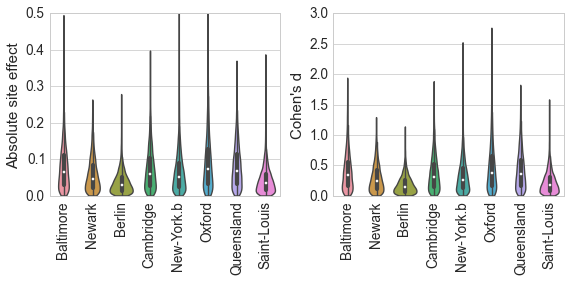

In [24]:
from scipy import stats

site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']

fig=plt.figure(figsize=(10, 4),dpi=300)
ax1 = plt.subplot2grid((1,5), (0,0),colspan=2)
for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k].std(axis=1)
    else:
        conn_vec_tmp = np.vstack((conn_vec_tmp,list_conn_sites[k].std(axis=1)))

n, p = 40, 8
conn_vec_tmp = conn_vec_tmp.T
intra_var = conn_vec_tmp.mean(axis=1)

conn_vec_tmp = pd.DataFrame(conn_vec_tmp,columns=site_names)
print conn_vec_tmp.shape
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

conn_vec_tmp = pd.DataFrame(np.abs(all_beta_inter).T,columns=site_names)
#fig=plt.figure(figsize=(5, 4))
# Show each distribution with both violins and points
ax = sns.violinplot(data=conn_vec_tmp,ax=ax1,cut=0)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax.set_ylim(0,0.5)
ax.set_ylabel('Absolute site effect')
#ax.text(-1.2,0.55,'A',horizontalalignment='left',verticalalignment='center',size=14)
#fig.tight_layout()
#plt.savefig(main_path + 'figures/boxplot_intrasite_var.png')




## detailled version
conn_vec_tmp = pd.DataFrame(all_beta_inter_cd.T,columns=site_names)
# Show each distribution with both violins and points

ax2 = plt.subplot2grid((1,5), (0, 2),colspan=2)
ax = sns.violinplot(data=conn_vec_tmp,ax=ax2,cut=0)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax.set_ylim(0,3)
#ax.set_ylabel('Inter-site absolute bias')
ax.set_ylabel('Cohen\'s d')
#ax.text(-1.2,3.3,'B',horizontalalignment='left',verticalalignment='center',size=14)

#plt.savefig(main_path + 'figures/boxplot_inter_var.png')

'''
## summary std
#fig=plt.figure(figsize=(5, 4))
ax3 = plt.subplot2grid((1,5), (0, 4))
print all_beta_intra.mean(),all_beta_inter.mean()
tmp_data = np.hstack((np.abs(all_beta_intra.T).mean(axis=1)[:,np.newaxis],np.abs(all_beta_inter.T).mean(axis=1)[:,np.newaxis]))
conn_vec_tmp = pd.DataFrame(tmp_data,columns=['Intra-site', 'Inter-site'])
# Show each distribution with both violins and points
ax = sns.violinplot(data=conn_vec_tmp,ax=ax3)
ax.set_ylim(-1,5)
#ax.set_ylabel('Std')
ax.text(-1,5.225,'C',horizontalalignment='left',verticalalignment='center',size=14)
ax2 = ax.twinx()
ax2.set_ylabel('Cohen\'s d')
ax2.set_ylim(-1,5)
ax2.yaxis.grid(False)
ax2.yaxis.set_ticks([])
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
'''


fig.tight_layout()
fig.subplots_adjust(hspace=.4)
plt.savefig(main_path + 'figures/boxplot_intra_inter_var.png',dpi=fig.dpi)

#print stats.ttest_rel(conn_vec_tmp['Intra-site'].values,conn_vec_tmp['Inter-site'].values)


print np.median(np.abs(all_beta_inter))
print np.median(np.abs(all_beta_inter_cd))

In [18]:
seeds_sel = np.array(
    [[1,53],
    [12,46],
    [49,76],
    [29,90],
    [81,90],
    [29,81],
    [29,76],
    [42,53],
    [12,39],
    [39,94],
    [71,76]])
seeds_beta_inter=[]
for i in range(all_beta_inter.shape[0]):
    seeds_beta_inter.append(ts.vec2mat(all_beta_inter[i,:])[seeds_sel[:,0],seeds_sel[:,1]])
seeds_beta_inter = np.array(seeds_beta_inter)

seeds_beta_inter_cd=[]
for i in range(all_beta_inter.shape[0]):
    seeds_beta_inter_cd.append(ts.vec2mat(all_beta_inter_cd[i,:])[seeds_sel[:,0],seeds_sel[:,1]])
seeds_beta_inter_cd = np.array(seeds_beta_inter_cd)

seeds_beta_inter_cd.shape

(8, 11)

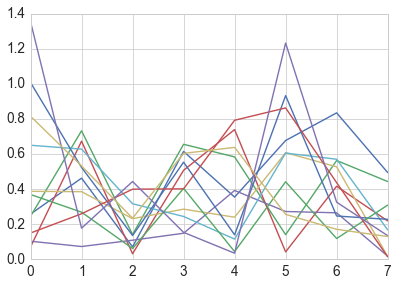

In [19]:
plt.plot(seeds_beta_inter_cd)

(4950, 8)


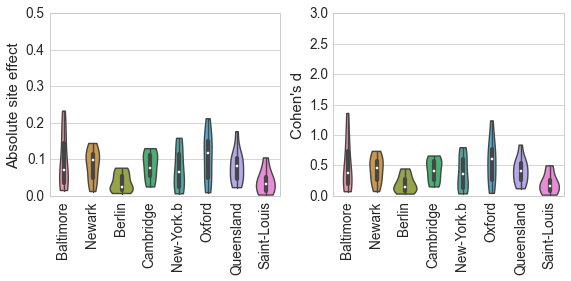

In [23]:
from scipy import stats

site_names = ['Baltimore','Newark','Berlin','Cambridge','New-York.b','Oxford','Queensland','Saint-Louis']

fig=plt.figure(figsize=(10, 4),dpi=300)
ax1 = plt.subplot2grid((1,5), (0,0),colspan=2)
for k in range(len(list_conn_sites)):
    if k==0:
        conn_vec_tmp = list_conn_sites[k].std(axis=1)
    else:
        conn_vec_tmp = np.vstack((conn_vec_tmp,list_conn_sites[k].std(axis=1)))

n, p = 40, 8
conn_vec_tmp = conn_vec_tmp.T
intra_var = conn_vec_tmp.mean(axis=1)

conn_vec_tmp = pd.DataFrame(conn_vec_tmp,columns=site_names)
print conn_vec_tmp.shape
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(p, rot=-.5, dark=.3)

conn_vec_tmp = pd.DataFrame(np.abs(seeds_beta_inter).T,columns=site_names)
#fig=plt.figure(figsize=(5, 4))
# Show each distribution with both violins and points
ax = sns.violinplot(data=conn_vec_tmp,ax=ax1,cut=0)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax.set_ylim(0,0.5)
ax.set_ylabel('Absolute site effect')
#
#ax.text(-1.2,0.55,'A',horizontalalignment='left',verticalalignment='center',size=14)
#fig.tight_layout()
#plt.savefig(main_path + 'figures/boxplot_intrasite_var.png')




## detailled version
conn_vec_tmp = pd.DataFrame(seeds_beta_inter_cd.T,columns=site_names)
# Show each distribution with both violins and points

ax2 = plt.subplot2grid((1,5), (0, 2),colspan=2)
ax = sns.violinplot(data=conn_vec_tmp,ax=ax2,cut=0)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
ax.set_ylim(0,3)
#ax.set_ylabel('Inter-site absolute bias')
ax.set_ylabel('Cohen\'s d')
#ax.text(-1.2,3.3,'B',horizontalalignment='left',verticalalignment='center',size=14)

#plt.savefig(main_path + 'figures/boxplot_inter_var.png')



fig.tight_layout()
fig.subplots_adjust(hspace=.4)
plt.savefig(main_path + 'figures/boxplot_intra_inter_var_seeds.png',dpi=fig.dpi)




In [21]:
#print stats.wilcoxon(conn_vec_tmp['Intra-site'].values,conn_vec_tmp['Intra-site'].values)
print stats.ttest_ind(conn_vec_tmp['Intra-site'].values,conn_vec_tmp['Inter-site'].values)

dd=mean(conn_vec_tmp.values,axis=0)
print dd
print dd[0]/dd[1]


KeyError: 'Intra-site'

In [ ]:
## network

In [26]:
reload(ts)
print np.tril_indices_from(np.array([[1,2,3],[4,5,6],[7,8,9]]), -1)
s=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

s_vec = np.array([5,9,13,10,14,15])

print ts.mat2vec(s)
print ts.vec2mat(s_vec)
print np.tril_indices_from(s, -1)

tril_indices(n=4,k=-1,m=4)

print s[np.tril_indices_from(s, -1)]
print np.triu_indices_from(s, 0)
idx = triu_indices(n=4,k=1,m=4)
print idx
#sorted_idx = np.argsort(idx,axis=-1)
print idx[0]

(array([1, 2, 2]), array([0, 0, 1]))
[ 5  9 13 10 14 15]
[[  1.   5.   9.  13.]
 [  5.   1.  10.  14.]
 [  9.  10.   1.  15.]
 [ 13.  14.  15.   1.]]
(array([1, 2, 2, 3, 3, 3]), array([0, 0, 1, 0, 1, 2]))
[ 5  9 10 13 14 15]
(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))
(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))
[0 0 0 1 1 2]


In [293]:
xx=load_file('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/connectomes/connectome_basc_sub02953' )
print xx.keys()
print xx.get('G').shape

['__version__', 'G', '__header__', '__globals__', 'thresh', 'ind_roi', 'type', 'conn']
(4950, 1)


In [160]:
import nilearn
from nilearn import plotting
import nibabel as nib

#im_ref = nib.load('sci100_scg100_scf100/brain_partition_consensus_group_sci100_scg100_scf100.mnc.gz')
im_ref = nib.load('basc_cambridge_sc100.mnc.gz')

#im_ref = nib.load('/Users/christian/neurorx/glm_connectome_local/sci100cambridge/effect_lhvol/data_to_del.mnc')
'''
im_ref
data = dm_vol
img = nib.Nifti1Image(data, np.eye(4))
img.get_data_dtype() == np.dtype(np.int16)
img.header.get_xyzt_units()
nib.save(img, os.path.join('build',main_path + '/test4d.nii.gz'))

from nilearn import datasets

###############################################################################
# Retrieve the data

localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2,
    get_tmaps=True)
localizer_tmap_filename = localizer_dataset.tmaps[1]



plotting.plot_glass_brain(img,threshold=0)
#vis.mat(partition[:,:,20,5])
#gen_fig(list_conn_sites)

partition[:,:,:,4].max()


###############################################################################
# Retrieve the data

localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2,
    get_tmaps=True)
localizer_tmap_filename = localizer_dataset.tmaps[1]

'''

###############################################################################
# demo glass brain plotting
#                          threshold=80,
plotting.plot_glass_brain(im_ref,
                          colorbar=True ,
                          threshold=1,
                          display_mode='xz'
                          
                         )

#plotting.plot_glass_brain(localizer_tmap_filename, title='plot_glass_brain',
#                          black_bg=True, display_mode='xz', threshold=3)

#import matplotlib.pyplot as plt
plt.show()

cut_coords = (0, 0, 30)

plotting.plot_anat(im_ref, cut_coords=cut_coords,
                   title='Anatomy image')
plotting.plot_anat(im_ref, cut_coords=cut_coords,
                   title='Anatomy image')


ImageFileError: Filespec "basc_cambridge_sc100.mnc.gz" does not look right for class <class 'nibabel.minc2.Minc2Image'>

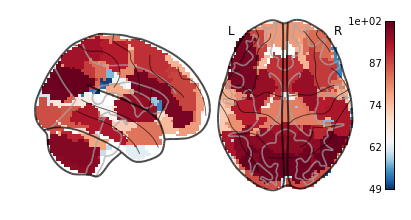

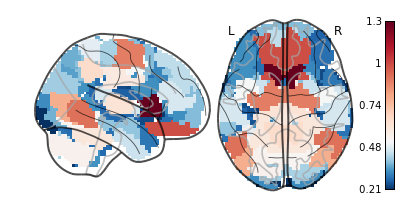

In [202]:

import copy

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

def mapvec2(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        if (i+1) == 1:
            im[idxs] = 0.5
        else:
            im[idxs] = 0
        
    return new_map


im_ref = nib.load('basc_cambridge_sc100.mnc')
im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())

#nn_map = mapvec2(site_mean[1,:],im_ref)
#print im_ref.get_data() == nn_map.get_data()
#print(im_ref)
#print(nib.Minc2Image(im_ref.get_data(), im_ref.get_affine()))
#print(copy.deepcopy(nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())))

nn_map = mapvec(site_mean[1,:],im_ref)
cmap_ = vis.get_cmap(nn_map.get_data(),[-0.2,0.5])
plotting.plot_glass_brain(im_ref,
                          cmap=cmap_,
                          colorbar=True ,
                          display_mode='xz'
                         )
nn_map = mapvec(site_mean[10,:],im_ref)
cmap_ = vis.get_cmap(nn_map.get_data(),[-0.2,0.5])
plotting.plot_glass_brain(nn_map,
                          cmap=cmap_,
                          colorbar=True ,
                          display_mode='xz'
                         )



#vis.mat(img[28,:,:])

In [122]:
print im_ref
new_map = copy.deepcopy(im_ref)
print new_map.get_data()

<class 'nibabel.minc1.Minc1Image'>
data shape (46, 64, 53)
affine: 
[[   0.    0.    3.  -78.]
 [   0.    3.    0. -112.]
 [   3.    0.    0.  -50.]
 [   0.    0.    0.    1.]]
metadata:
[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0

Exception AttributeError: "'GzipFile' object has no attribute 'fileobj'" in <bound method netcdf_file.close of <nibabel.externals.netcdf.netcdf_file object at 0x10bdab950>> ignored


In [15]:
localizer_tmap_filename

'/Users/christian/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz'

In [ ]:
0.2/(0.2+1.2)

a=np.array([1,2,3])
n=3
(2**(n+4))+n

(16*n)+2*n+1

frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(True)
frame1.axes.get_yaxis()
        


In [ ]:
gs = gridspec.GridSpec(4, 4)
ax1 = plt.subplot(gs[0, 1:1+2])
ax2 = plt.subplot(gs[1,:-1])
ax3 = plt.subplot(gs[1:, -1])
ax4 = plt.subplot(gs[-1,0])
ax5 = plt.subplot(gs[-1,-2])

In [17]:


t, prob = stats.ttest_ind(list_conn_sites[1],list_conn_sites[5],1,equal_var=False)
t, prob

vis.matrix.mat(ts.vec2mat(prob)*(ts.vec2mat(prob)<0.001))

cmap = vis.matrix.get_cmap(prob,[0,1])


fig = plt.figure(figsize=(3,3))
ax1 = fig.add_axes([0.8, 0.05, 0.1, 0.9])
vis.matrix.color_bar_vertical(ax1, cmap, [0,1])
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
vis.matrix.color_bar_horizontal(ax1, cmap, [0,1])

plt.subplot(grid2[0, :])

2+2

AttributeError: type object 'matrix' has no attribute 'mat'